###***Análisis de Evasión de Clientes (Churn) - Telecom X***

#📌 Extracción

In [ ]:
#/content/TelecomX_Churn_Project

In [4]:
import pandas as pd
import requests

In [5]:

def cargar_datos_telecom(url):
    """
    Descarga datos JSON desde una URL y los convierte en un DataFrame.
    Retorna el DataFrame si es exitoso, o None si hay error.
    """
    print(f"📡 Conectando a la API: {url} ...")

    try:
        # 1. Realizar la petición (Request)
        response = requests.get(url)

        # 2. Verificar estado HTTP (200 = OK)
        if response.status_code == 200:
            print("✅ Datos descargados exitosamente.")

            # 3. Convertir JSON a estructura de Python
            data_json = response.json()

            # 4. Convertir a DataFrame de Pandas
            df = pd.DataFrame(data_json)

            print(f"📊 DataFrame creado con dimensiones: {df.shape}")
            return df
        else:
            print(f"❌ Error en la descarga. Código de estado: {response.status_code}")
            return None

    except Exception as e:
        print(f"❌ Ocurrió un error inesperado: {e}")
        return None

# --- Ejecución ---

# Usamos la URL RAW para obtener el JSON directo
url_api = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

df_telecom = cargar_datos_telecom(url_api)

# Validación rápida
if df_telecom is not None:
    # Mostramos las primeras 5 filas para ver la estructura
    print("\n🔍 Vista previa de los datos:")
    print(df_telecom.head())

    # Información técnica de las columnas
    print("\nℹ️ Información del DataFrame:")
    print(df_telecom.info())

📡 Conectando a la API: https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json ...
✅ Datos descargados exitosamente.
📊 DataFrame creado con dimensiones: (7267, 6)

🔍 Vista previa de los datos:
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'N

In [6]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [7]:
df_telecom.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [ ]:
import pandas as pd

# 1. Hacemos una copia para trabajar seguros
df_limpio = df_telecom.copy()

# 2. Lista de columnas que detectamos que son diccionarios
columnas_anidadas = ['customer', 'phone', 'internet', 'account']

print(f"Dimensiones antes de limpiar: {df_limpio.shape}\n")

for col in columnas_anidadas:
    # Abrimos(liberamos) las columnas anidadas: convierte las claves internas en nuevas columnas
    # Usamos df_limpio[col].to_list() porque normalize espera una lista de dicts
    datos_liberados = pd.json_normalize(df_limpio[col].tolist())

    # IMPORTANTE: Al aplanar, perdemos el índice original. Lo reseteamos para concatenar bien.
    datos_liberados.index = df_limpio.index

    # Unimos las nuevas columnas al DataFrame principal
    df_limpio = pd.concat([df_limpio, datos_liberados], axis=1)

    # Borramos la "caja cerrada" original, ya no la necesitamos
    df_limpio.drop(columns=[col], inplace=True)

print(f"Dimensiones después de limpiar: {df_limpio.shape}")

# 3. Veamos el resultado
df_limpio.head()

Dimensiones antes de limpiar: (7267, 6)

Dimensiones después de limpiar: (7267, 21)


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
df_limpio.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
# Valores ÚNICOS existen en la columna Churn

print("🔍 Valores únicos en la columna Churn:")
print(df_telecom['Churn'].unique())

print("\n📊 Conteo de cada valor:")
print(df_telecom['Churn'].value_counts(dropna=False))

🔍 Valores únicos en la columna Churn:
['No' 'Yes' '']

📊 Conteo de cada valor:
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64


In [ ]:
# 1. Filtramos vacíos
print(f"Filas antes de filtrar vacíos: {df_limpio.shape[0]}")
df_final = df_limpio[df_limpio['Churn'] != ''].copy()

# 2. Quitamos espacios en blanco invisibles (por seguridad)
df_final['Churn'] = df_final['Churn'].astype(str).str.strip()

# 3. Mapeo
# Verificamos qué hay antes de mapear
print("Valores en Churn antes de mapear:", df_final['Churn'].unique())

mapa_churn = {'Yes': 1, 'No': 0}
df_final['Churn'] = df_final['Churn'].map(mapa_churn)

# 4. Verificación inmediata
print("Valores en Churn DESPUÉS de mapear:", df_final['Churn'].unique())

# 5. Limpieza de Charges.Total
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')
df_final = df_final.dropna(subset=['Charges.Total'])

# 6. Guardado
ruta_guardado = '/content/TelecomX_Churn_Project/data/processed/telecom_churn_clean.csv'
df_final.to_csv(ruta_guardado, index=False)

print(f"\n✅ Archivo guardado correctamente en: {ruta_guardado}\n")
print(df_final.info())

Filas antes de filtrar vacíos: 7267
Valores en Churn antes de mapear: ['No' 'Yes']
Valores en Churn DESPUÉS de mapear: [0 1]

✅ Archivo guardado correctamente en: /content/TelecomX_Churn_Project/data/processed/telecom_churn_clean.csv

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   int64  
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  

In [ ]:
df_final

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,0,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,0,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,1,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,1,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,1,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,1,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,0,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,0,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [ ]:
# --- ESCÁNER DE CALIDAD DE DATOS (Duplicados y Categorías) ---

print("🔍 1. Verificación de Duplicados:\n")
duplicados = df_limpio.duplicated().sum()
print(f"   Filas duplicadas encontradas: {duplicados}\n")

if duplicados > 0:
    print("   ⚠️ Eliminando duplicados...")
    df_limpio = df_limpio.drop_duplicates()
    print(f"   ✅ Duplicados eliminados. Nuevas dimensiones: {df_limpio.shape}")
else:
    print("   ✅ No hay duplicados. ¡Perfecto!")

print("\n🔍 2. Verificación de Consistencia en Categorías:")
# Seleccionamos solo las columnas de texto (object) para no revisar números
cols_texto = df_limpio.select_dtypes(include=['object']).columns

# Excluimos el ID del cliente porque todos son diferentes
cols_a_revisar = [col for col in cols_texto if 'customerID' not in col]

for col in cols_a_revisar:
    valores_unicos = df_limpio[col].unique()
    print(f"   📌 {col}: {valores_unicos}")

    # Alerta rápida si vemos muchas variaciones (opcional)
    if len(valores_unicos) > 5:
        print(f"      (Ojo al piojo: Esta columna tiene muchos valores distintos)")

print("\n✨ ¡Escaneo finalizado!")

🔍 1. Verificación de Duplicados:

   Filas duplicadas encontradas: 0

   ✅ No hay duplicados. ¡Perfecto!

🔍 2. Verificación de Consistencia en Categorías:
   📌 Churn: ['No' 'Yes' '']
   📌 gender: ['Female' 'Male']
   📌 Partner: ['Yes' 'No']
   📌 Dependents: ['Yes' 'No']
   📌 PhoneService: ['Yes' 'No']
   📌 MultipleLines: ['No' 'Yes' 'No phone service']
   📌 InternetService: ['DSL' 'Fiber optic' 'No']
   📌 OnlineSecurity: ['No' 'Yes' 'No internet service']
   📌 OnlineBackup: ['Yes' 'No' 'No internet service']
   📌 DeviceProtection: ['No' 'Yes' 'No internet service']
   📌 TechSupport: ['Yes' 'No' 'No internet service']
   📌 StreamingTV: ['Yes' 'No' 'No internet service']
   📌 StreamingMovies: ['No' 'Yes' 'No internet service']
   📌 Contract: ['One year' 'Month-to-month' 'Two year']
   📌 PaperlessBilling: ['Yes' 'No']
   📌 PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
   📌 Charges.Total: ['593.3' '542.4' '280.85' ... '742.9' '462

#📊 Carga y análisis

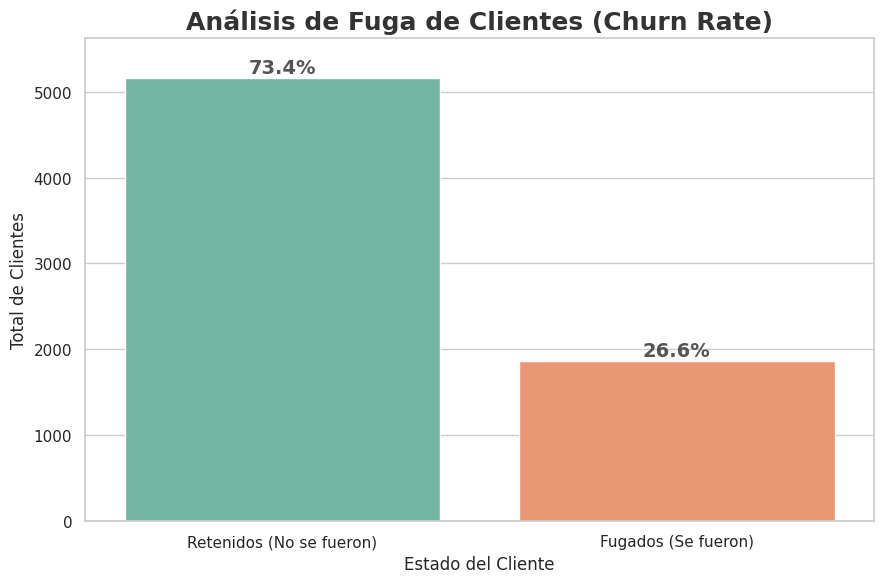


📉 Resumen:
   - Clientes que se quedaron: 5163
   - Clientes que se fueron:   1869
   - Tasa de Fuga (Churn):     26.58%


In [ ]:
# --- GRÁFICO 1: ANÁLISIS DE FUGA DE CLIENTES ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignorar advertencias molestas (FutureWarnings, DeprecationWarnings)
warnings.filterwarnings("ignore")

# 1. Aseguramos que los datos estén cargados (por si acaso)
df = pd.read_csv('/content/TelecomX_Churn_Project/data/processed/telecom_churn_clean.csv')

# --- CONFIGURACIÓN DE ESTILO ---
sns.set_style("whitegrid")  # Fondo de rejilla blanco
plt.figure(figsize=(9, 6))  # Tamaño un poco más ancho

# --- CREACIÓN DEL GRÁFICO ---
# CORRECCIÓN DEL ERROR: Agregamos hue='Churn' y legend=False
# Esto asigna el color basado en la columna Churn y oculta la leyenda redundante
ax = sns.countplot(x='Churn', data=df, hue='Churn', palette='Set2', legend=False)

# --- PERSONALIZACIÓN ---
plt.title('Análisis de Fuga de Clientes (Churn Rate)', fontsize=18, fontweight='bold', color='#333333')
plt.xlabel('Estado del Cliente', fontsize=12)
plt.ylabel('Total de Clientes', fontsize=12)

# Cambiar las etiquetas del eje X (0 y 1) por texto legible
ax.set_xticklabels(['Retenidos (No se fueron)', 'Fugados (Se fueron)'])

# --- ETIQUETAS DE PORCENTAJE ---
total = len(df)
for p in ax.patches:
    height = p.get_height()
    # Calcular porcentaje
    percentage = f'{100 * height / total:.1f}%'

    # Coordenadas para el texto
    x = p.get_x() + p.get_width() / 2
    y = height + 50 # Un poco más arriba de la barra

    # Escribir el texto
    ax.annotate(percentage, (x, y), ha='center', fontsize=14, fontweight='bold', color='#555555')

# Ajustar márgenes y mostrar
plt.ylim(0, total * 0.8) # Dar aire arriba
plt.tight_layout()
plt.show()

# Dato exacto en texto
conteo = df['Churn'].value_counts()
tasa = df['Churn'].mean() * 100
print(f"\n📉 Resumen:")
print(f"   - Clientes que se quedaron: {conteo[0]}")
print(f"   - Clientes que se fueron:   {conteo[1]}")
print(f"   - Tasa de Fuga (Churn):     {tasa:.2f}%")


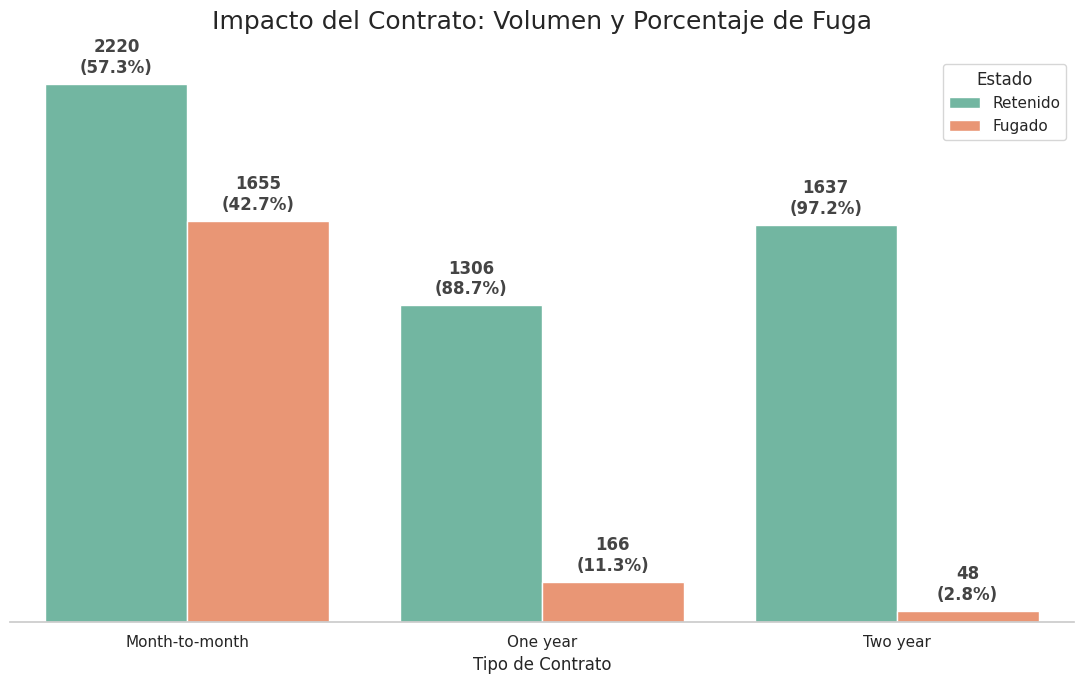

In [ ]:
# --- GRÁFICO 2: ANÁLISIS POR TIPO DE CONTRATO ---

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(11, 7))

# 1. PREPARACIÓN DE DATOS
df_plot = df.copy()
df_plot['Status'] = df_plot['Churn'].map({0: 'Retenido', 1: 'Fugado'})

# Calculamos los totales por contrato para poder dividir después
# (Esto nos da: Month-to-month: 3875, One year: 1473, etc.)
totales_por_contrato = df_plot['Contract'].value_counts()

# Definimos el orden explícito para que no se mezclen los datos
orden_contratos = ['Month-to-month', 'One year', 'Two year']

# 2. GRÁFICO BASE
ax = sns.countplot(x='Contract', hue='Status', data=df_plot,
                   palette='Set2', order=orden_contratos)

# 3. ESTÉTICA MINIMALISTA
plt.title('Impacto del Contrato: Volumen y Porcentaje de Fuga', fontsize=18, pad=20)
plt.xlabel('Tipo de Contrato', fontsize=12)
plt.ylabel('')
ax.get_yaxis().set_visible(False)
sns.despine(left=True)
plt.legend(title='Estado', loc='upper right')

# 4. ETIQUETADO INTELIGENTE (Cantidad + Porcentaje)
for p in ax.patches:
    height = p.get_height()

    # Truco para saber en qué categoría (barra) estamos:
    # La coordenada X nos dice si es la barra 0, 1 o 2
    # p.get_x() + ancho/2 es el centro de la barra. Redondeamos para obtener el índice 0, 1, 2.
    idx_categoria = int(round(p.get_x() + p.get_width() / 2))

    # Obtenemos el nombre del contrato usando el índice
    nombre_contrato = orden_contratos[idx_categoria]

    # Buscamos el total real de ese contrato
    total_grupo = totales_por_contrato[nombre_contrato]

    # Calculamos porcentaje
    porcentaje = (height / total_grupo) * 100

    if height > 0:
        # Formato: "1655\n(42.7%)"
        # El \n hace un salto de línea para que quede uno arriba del otro
        texto_etiqueta = f'{int(height)}\n({porcentaje:.1f}%)'

        ax.annotate(texto_etiqueta,
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    fontsize=12, fontweight='bold', color='#444444',
                    xytext=(0, 5),
                    textcoords='offset points')

plt.tight_layout()
plt.show()

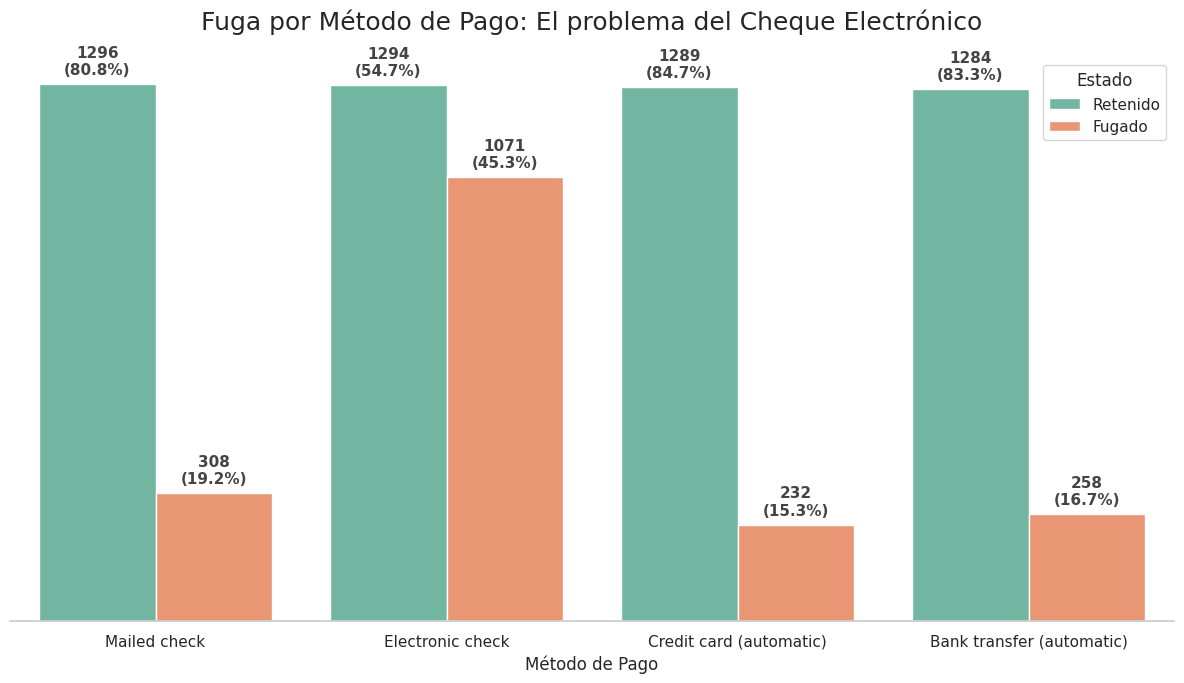

In [ ]:
# --- GRÁFICO 3: ANÁLISIS FUGA POR METODO DE PAGO ---

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7)) # Un poco más ancho porque los nombres son largos

# 1. PREPARACIÓN
df_plot = df.copy()
df_plot['Status'] = df_plot['Churn'].map({0: 'Retenido', 1: 'Fugado'})

# Calculamos totales por método para los porcentajes
totales_pago = df_plot['PaymentMethod'].value_counts()

# 2. GRÁFICO
ax = sns.countplot(x='PaymentMethod', hue='Status', data=df_plot, palette='Set2')

# 3. ESTÉTICA "PREMIUM"
plt.title('Fuga por Método de Pago: El problema del Cheque Electrónico', fontsize=18, pad=20)
plt.xlabel('Método de Pago', fontsize=12)
plt.ylabel('')
ax.get_yaxis().set_visible(False) # Sin eje Y
sns.despine(left=True) # Sin bordes
plt.legend(title='Estado', loc='upper right')

# 4. ETIQUETAS INTELIGENTES (Valor + %)
for p in ax.patches:
    height = p.get_height()

    # Lógica para encontrar la categoría correcta en el eje X
    # (Como las barras están agrupadas, el centro nos dice el índice)
    idx_categoria = int(round(p.get_x() + p.get_width() / 2))

    # OJO: Seaborn a veces cambia el orden. Aseguramos obtener el nombre correcto
    # Obtenemos las etiquetas del eje X en orden
    labels_x = [item.get_text() for item in ax.get_xticklabels()]
    nombre_categoria = labels_x[idx_categoria]

    # Calculamos porcentaje
    total_grupo = totales_pago[nombre_categoria]
    porcentaje = (height / total_grupo) * 100

    if height > 0:
        texto_etiqueta = f'{int(height)}\n({porcentaje:.1f}%)'

        ax.annotate(texto_etiqueta,
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    fontsize=11, fontweight='bold', color='#444444',
                    xytext=(0, 5),
                    textcoords='offset points')

plt.tight_layout()
plt.show()

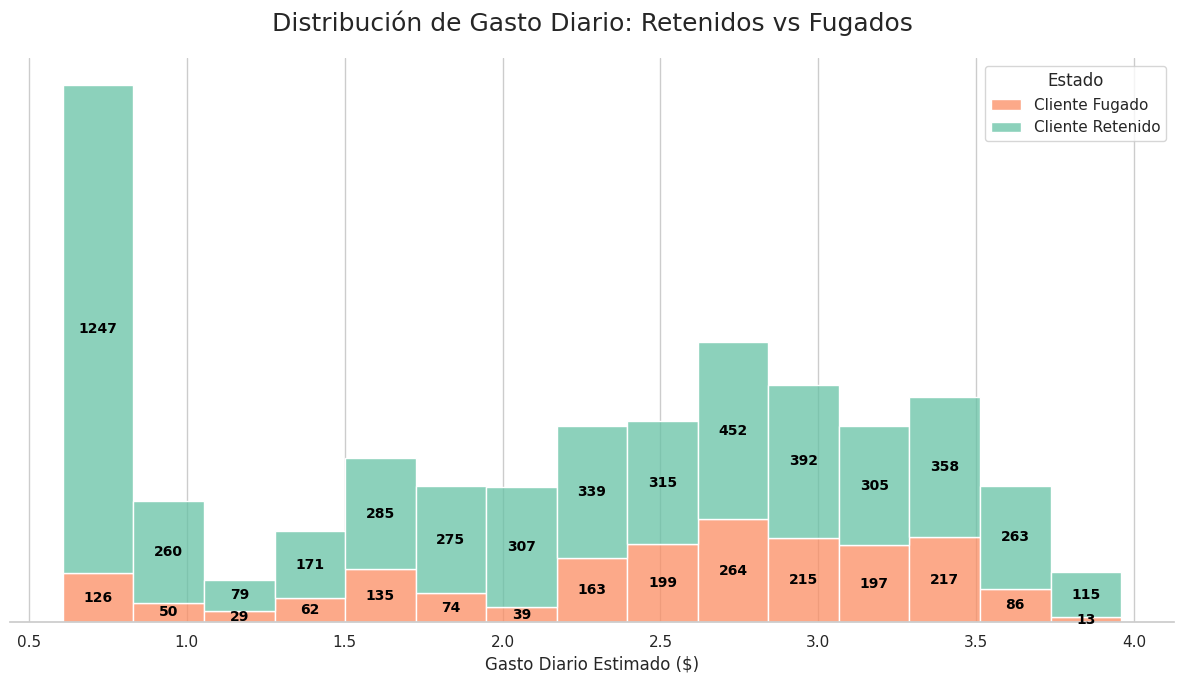


📊 Resumen del Gasto Diario ($):


,count,mean,std,min,25%,50%,75%,max
Status_Cliente,,,,,,,,
Cliente Fugado,"1,869",$2.48,$0.82,$0.63,$1.87,$2.66,$3.14,$3.94
Cliente Retenido,"5,163",$2.04,$1.04,$0.61,$0.84,$2.15,$2.95,$3.96


In [ ]:
#Creando la Variable "Cuentas Diarias"
# --- GRÁFICO 4: ANÁLISIS GASTO DIARIO ---

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Preparación de datos (igual que tu código)
if 'Charges.Daily' not in df.columns:
    df['Charges.Daily'] = df['Charges.Monthly'] / 30

df['Status_Cliente'] = df['Churn'].map({0: 'Cliente Retenido', 1: 'Cliente Fugado'})

# --- GRÁFICO ---
plt.figure(figsize=(12, 7))

# Guardamos el gráfico en 'ax' para manipularlo
ax = sns.histplot(data=df, x='Charges.Daily', hue='Status_Cliente',
                  multiple='stack',
                  palette={'Cliente Retenido': '#66c2a5', 'Cliente Fugado': '#fc8d62'},
                  bins=15) # TIP: Definir 'bins' ayuda a que las barras no sean demasiado delgadas para el texto

# --- ESTÉTICA LIMPIA (Tu solicitud) ---
plt.title('Distribución de Gasto Diario: Retenidos vs Fugados', fontsize=18, pad=20)
plt.xlabel('Gasto Diario Estimado ($)', fontsize=12)
plt.ylabel('')  # Quitamos etiqueta Y

# 1. OCULTAR EJE Y Y BORDES
ax.get_yaxis().set_visible(False)
sns.despine(left=True) # Quita la línea de la izquierda

# Ajustamos leyenda
plt.legend(title='Estado', labels=['Cliente Fugado', 'Cliente Retenido'], loc='upper right')

# 2. AGREGAR VALORES EN LAS BARRAS (Etiquetado)
for p in ax.patches:
    height = p.get_height() # Cantidad de clientes en ese segmento
    width = p.get_width()
    x = p.get_x()
    y = p.get_y()

    # Solo ponemos el número si la barra es lo suficientemente alta para que se lea
    if height > 0:
        # Calculamos el centro exacto del bloque (x + mitad ancho, y + mitad altura)
        text_x = x + width / 2
        text_y = y + height / 2

        ax.text(text_x, text_y, int(height),
                ha='center', va='center',
                fontsize=10, color='black', fontweight='bold')

plt.tight_layout()
plt.show()

# --- ESTADÍSTICAS ---
print("\n📊 Resumen del Gasto Diario ($):")
resumen_diario = df.groupby('Status_Cliente')['Charges.Daily'].describe()

formato = {
    'count': '{:,.0f}',
    'mean': '${:,.2f}',
    'std': '${:,.2f}',
    'min': '${:,.2f}',
    '25%': '${:,.2f}',
    '50%': '${:,.2f}',
    '75%': '${:,.2f}',
    'max': '${:,.2f}'
}

display(resumen_diario.style.format(formato))

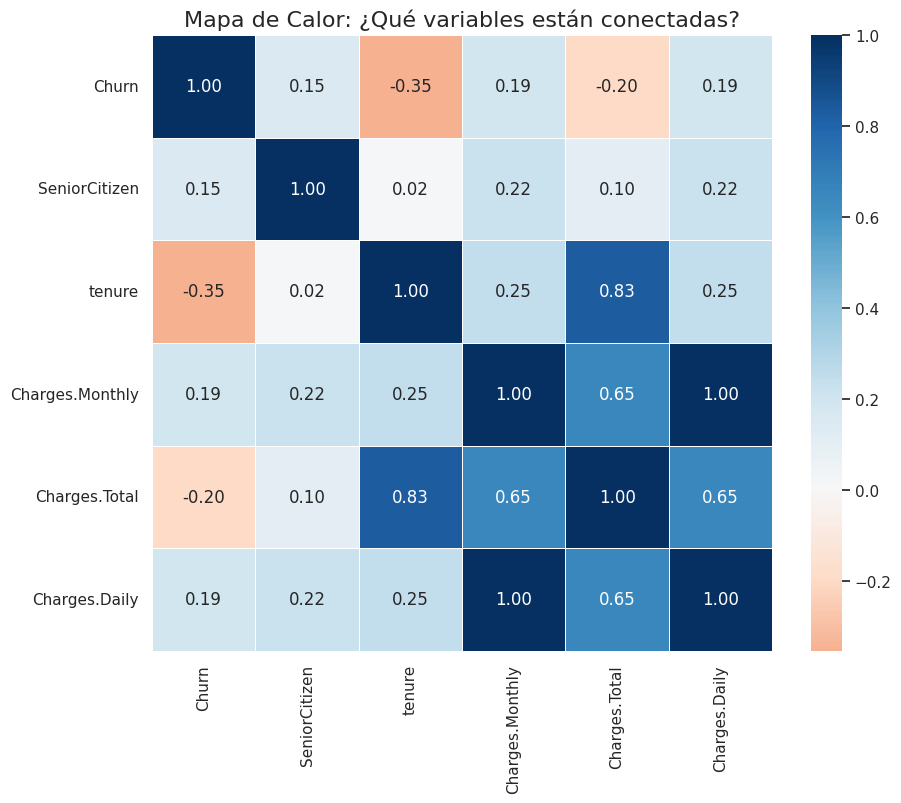

In [ ]:
# --- GRÁFICO 5: ANÁLISIS MATRIZ DE CORRELACIÓN ---

plt.figure(figsize=(10, 8))

# 1. Filtramos solo las columnas numéricas (la correlación matemática solo funciona con números)
# Esto incluye: Churn, tenure, SeniorCitizen, Charges.Monthly, Charges.Total, Charges.Daily
df_numerico = df.select_dtypes(include=['number'])

# 2. Calculamos la correlación
matriz_corr = df_numerico.corr()

# 3. Dibujamos el Mapa de Calor (Heatmap)
sns.heatmap(matriz_corr,
            annot=True,       # Escribir el número dentro del cuadro
            cmap='RdBu',      # Colores Rojo (Positivo) y Azul (Negativo)
            center=0,         # El blanco es el 0 (sin relación)
            fmt=".2f",        # 2 decimales
            linewidths=0.5)   # Líneas blancas entre cuadros

plt.title('Mapa de Calor: ¿Qué variables están conectadas?', fontsize=16)
plt.show()

##Análisis Descriptivo

In [ ]:
# --- ANÁLISIS DESCRIPTIVO ---

# 1. Estadísticas de Variables Numéricas (Media, Desv. Estándar, Mín/Máx)
print("🔢 Estadísticas de Variables Numéricas:")
# Transponemos (.T) para leerlo más fácil si hay muchas columnas
display(df.describe().T)

# 2. Estadísticas de Variables Categóricas (Moda, Frecuencia, Valores Únicos)
print("\n📝 Estadísticas de Variables Categóricas (Texto):")
display(df.describe(include=['object']).T)

🔢 Estadísticas de Variables Numéricas:


,count,mean,std,min,25%,50%,75%,max
Churn,7032.0,0.265785,0.441782,0.000000,0.00000,0.000,1.000000,1.000000
SeniorCitizen,7032.0,0.162400,0.368844,0.000000,0.00000,0.000,0.000000,1.000000
tenure,7032.0,32.421786,24.545260,1.000000,9.00000,29.000,55.000000,72.000000
Charges.Monthly,7032.0,64.798208,30.085974,18.250000,35.58750,70.350,89.862500,118.750000
Charges.Total,7032.0,2283.300441,2266.771362,18.800000,401.45000,1397.475,3794.737500,8684.800000
Charges.Daily,7032.0,2.159940,1.002866,0.608333,1.18625,2.345,2.995417,3.958333



📝 Estadísticas de Variables Categóricas (Texto):


,count,unique,top,freq
customerID,7032,7032,9995-HOTOH,1
gender,7032,2,Male,3549
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094


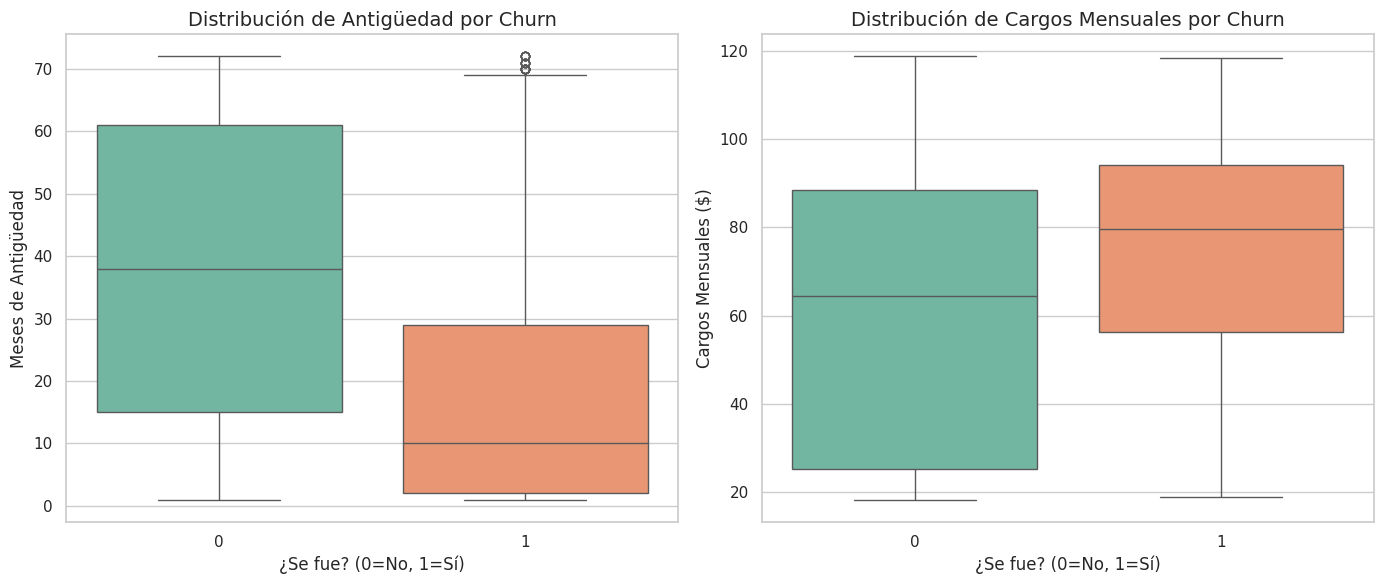

In [ ]:
# --- GRÁFICO 6: BOXPLOTS (DISTRIBUCIÓN) ---

plt.figure(figsize=(14, 6))

# Subgráfico 1: Antigüedad vs Churn
plt.subplot(1, 2, 1) # (1 fila, 2 columnas, gráfico 1)
sns.boxplot(x='Churn', y='tenure', data=df, palette='Set2')
plt.title('Distribución de Antigüedad por Churn', fontsize=14)
plt.xlabel('¿Se fue? (0=No, 1=Sí)')
plt.ylabel('Meses de Antigüedad')

# Subgráfico 2: Cargos Mensuales vs Churn
plt.subplot(1, 2, 2) # (1 fila, 2 columnas, gráfico 2)
sns.boxplot(x='Churn', y='Charges.Monthly', data=df, palette='Set2')
plt.title('Distribución de Cargos Mensuales por Churn', fontsize=14)
plt.xlabel('¿Se fue? (0=No, 1=Sí)')
plt.ylabel('Cargos Mensuales ($)')

plt.tight_layout()
plt.show()

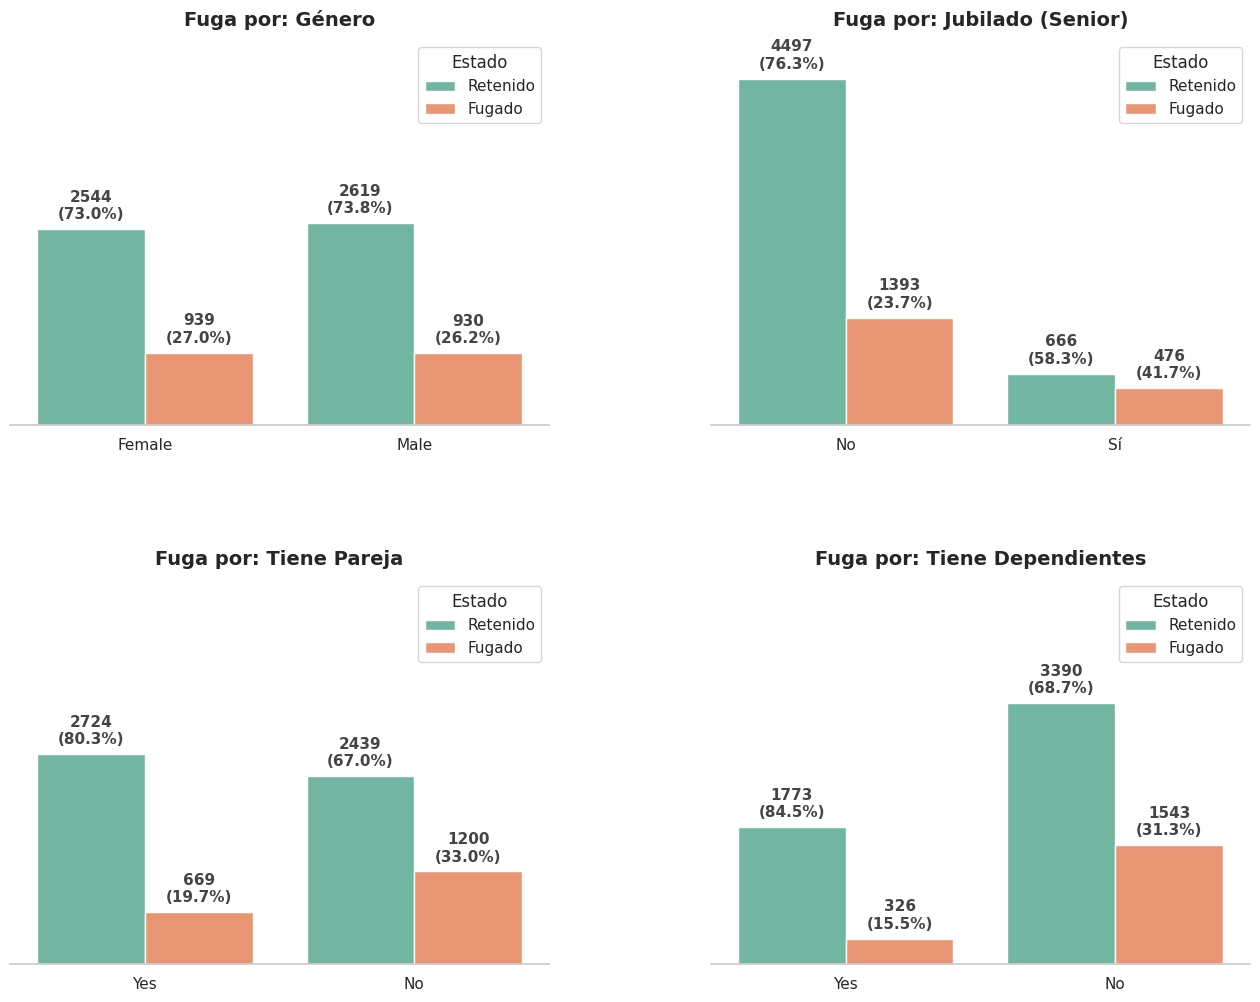

In [ ]:
# --- GRÁFICO 7: ANÁLISIS DEMOGRÁFICO ---

import matplotlib.pyplot as plt
import seaborn as sns

# Definimos las 4 variables
cols_demo = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

plt.figure(figsize=(16, 12))

# AJUSTE DE ESPACIO (Tu petición de separación)
# hspace=0.4 separa verticalmente, wspace=0.3 separa horizontalmente
plt.subplots_adjust(hspace=0.4, wspace=0.3)

for i, col in enumerate(cols_demo, 1):
    ax = plt.subplot(2, 2, i)

    # --- TRUCO: CORREGIR EL 0 Y 1 DE SENIOR CITIZEN ---
    # Usamos una data temporal para este gráfico
    df_temp = df.copy()

    # Si la columna es SeniorCitizen, cambiamos 0 y 1 por texto
    if col == 'SeniorCitizen':
        df_temp[col] = df_temp[col].map({0: 'No', 1: 'Sí'})

    # 1. Preparar datos para porcentajes (basado en la data corregida)
    total_por_categoria = df_temp[col].value_counts()

    # 2. Crear el gráfico usando df_temp
    sns.countplot(x=col, hue='Churn', data=df_temp, palette='Set2')

    # Tope en 5000 para consistencia
    plt.ylim(0, 5000)

    # 3. Estética
    titu_map = {'gender': 'Género', 'SeniorCitizen': 'Jubilado (Senior)',
                'Partner': 'Tiene Pareja', 'Dependents': 'Tiene Dependientes'}

    # Usamos un título en español más bonito si está en el mapa, si no el original
    titulo = titu_map.get(col, col)
    plt.title(f'Fuga por: {titulo}', fontsize=14, fontweight='bold', pad=10)
    plt.xlabel('') # Quitamos la etiqueta X porque el título ya lo dice
    plt.ylabel('')

    ax.get_yaxis().set_visible(False)
    sns.despine(left=True)
    plt.legend(title='Estado', labels=['Retenido', 'Fugado'], loc='upper right')

    # 4. Etiquetado Automático
    for p in ax.patches:
        height = p.get_height()

        if height > 0:
            labels_x = [item.get_text() for item in ax.get_xticklabels()]
            idx_categoria = int(round(p.get_x() + p.get_width() / 2))

            if 0 <= idx_categoria < len(labels_x):
                nombre_categoria = labels_x[idx_categoria]

                # Como ya convertimos todo a texto con el .map arriba,
                # no necesitamos trucos extra para números.

                # Protección: Si por alguna razón la categoría no está en los totales, saltamos
                if nombre_categoria in total_por_categoria:
                    total_grupo = total_por_categoria[nombre_categoria]
                    porcentaje = (height / total_grupo) * 100

                    texto = f'{int(height)}\n({porcentaje:.1f}%)'

                    ax.annotate(texto,
                                (p.get_x() + p.get_width() / 2., height),
                                ha='center', va='bottom',
                                fontsize=11, color='#444444', fontweight='bold',
                                xytext=(0, 5), textcoords='offset points')

plt.show()

##Distribución de evasión

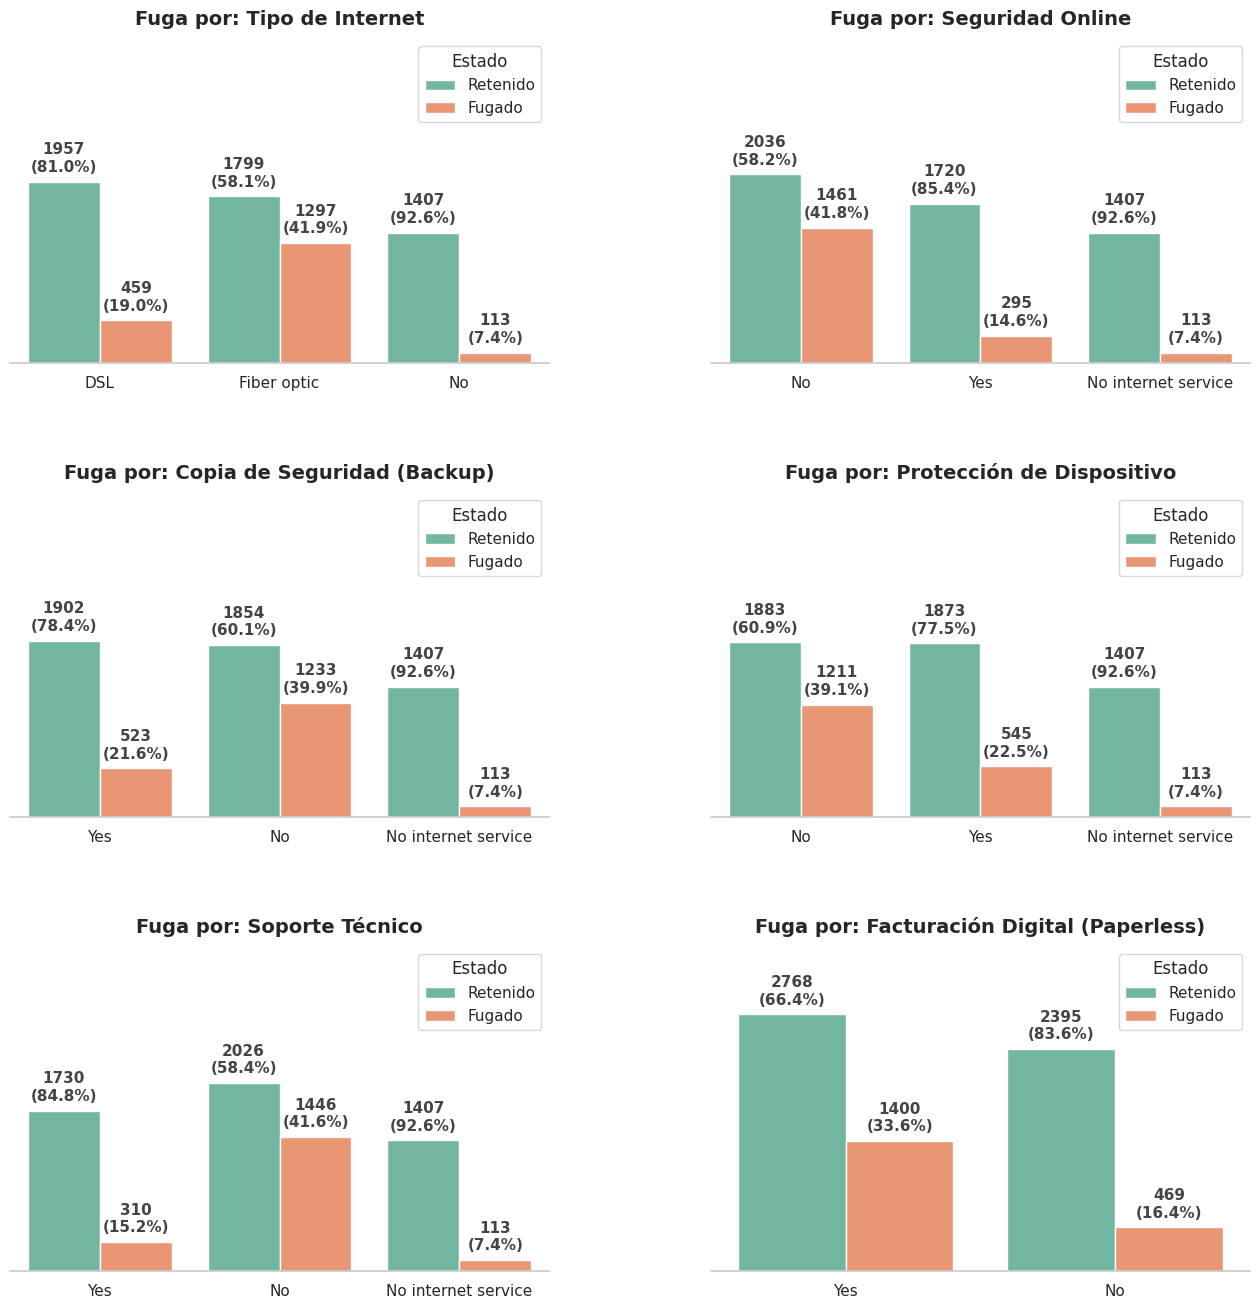

In [ ]:
# --- GRÁFICO 8: ANÁLISIS DE SERVICIOS Y OPERACIONES ---

import matplotlib.pyplot as plt
import seaborn as sns

# Definimos las variables de servicios
cols_servicios = [
    'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'PaperlessBilling'
]

# Mapa para traducir los títulos al español
titu_map = {
    'InternetService': 'Tipo de Internet',
    'OnlineSecurity': 'Seguridad Online',
    'OnlineBackup': 'Copia de Seguridad (Backup)',
    'DeviceProtection': 'Protección de Dispositivo',
    'TechSupport': 'Soporte Técnico',
    'PaperlessBilling': 'Facturación Digital (Paperless)'
}

plt.figure(figsize=(16, 16)) # Más alto porque son 3 filas

# Ajuste de espacios
plt.subplots_adjust(hspace=0.4, wspace=0.3)

for i, col in enumerate(cols_servicios, 1):
    ax = plt.subplot(3, 2, i) # 3 filas, 2 columnas

    # 1. Preparar datos (Totales para %)
    total_por_categoria = df[col].value_counts()

    # 2. Gráfico
    sns.countplot(x=col, hue='Churn', data=df, palette='Set2')

    # 3. Estética Premium
    plt.ylim(0, 3500) # Tope consistente

    titulo = titu_map.get(col, col)
    plt.title(f'Fuga por: {titulo}', fontsize=14, fontweight='bold', pad=10)
    plt.xlabel('')
    plt.ylabel('')

    # Limpieza
    ax.get_yaxis().set_visible(False)
    sns.despine(left=True)
    plt.legend(title='Estado', labels=['Retenido', 'Fugado'], loc='upper right')

    # 4. Etiquetas con Porcentaje
    for p in ax.patches:
        height = p.get_height()

        if height > 0:
            labels_x = [item.get_text() for item in ax.get_xticklabels()]
            idx_categoria = int(round(p.get_x() + p.get_width() / 2))

            if 0 <= idx_categoria < len(labels_x):
                nombre_categoria = labels_x[idx_categoria]

                # Protección: Verificar que la categoría exista
                if nombre_categoria in total_por_categoria:
                    total_grupo = total_por_categoria[nombre_categoria]
                    porcentaje = (height / total_grupo) * 100

                    texto = f'{int(height)}\n({porcentaje:.1f}%)'

                    ax.annotate(texto,
                                (p.get_x() + p.get_width() / 2., height),
                                ha='center', va='bottom',
                                fontsize=11, color='#444444', fontweight='bold',
                                xytext=(0, 5), textcoords='offset points')

plt.show()

##Recuento de evasión por variables categóricas

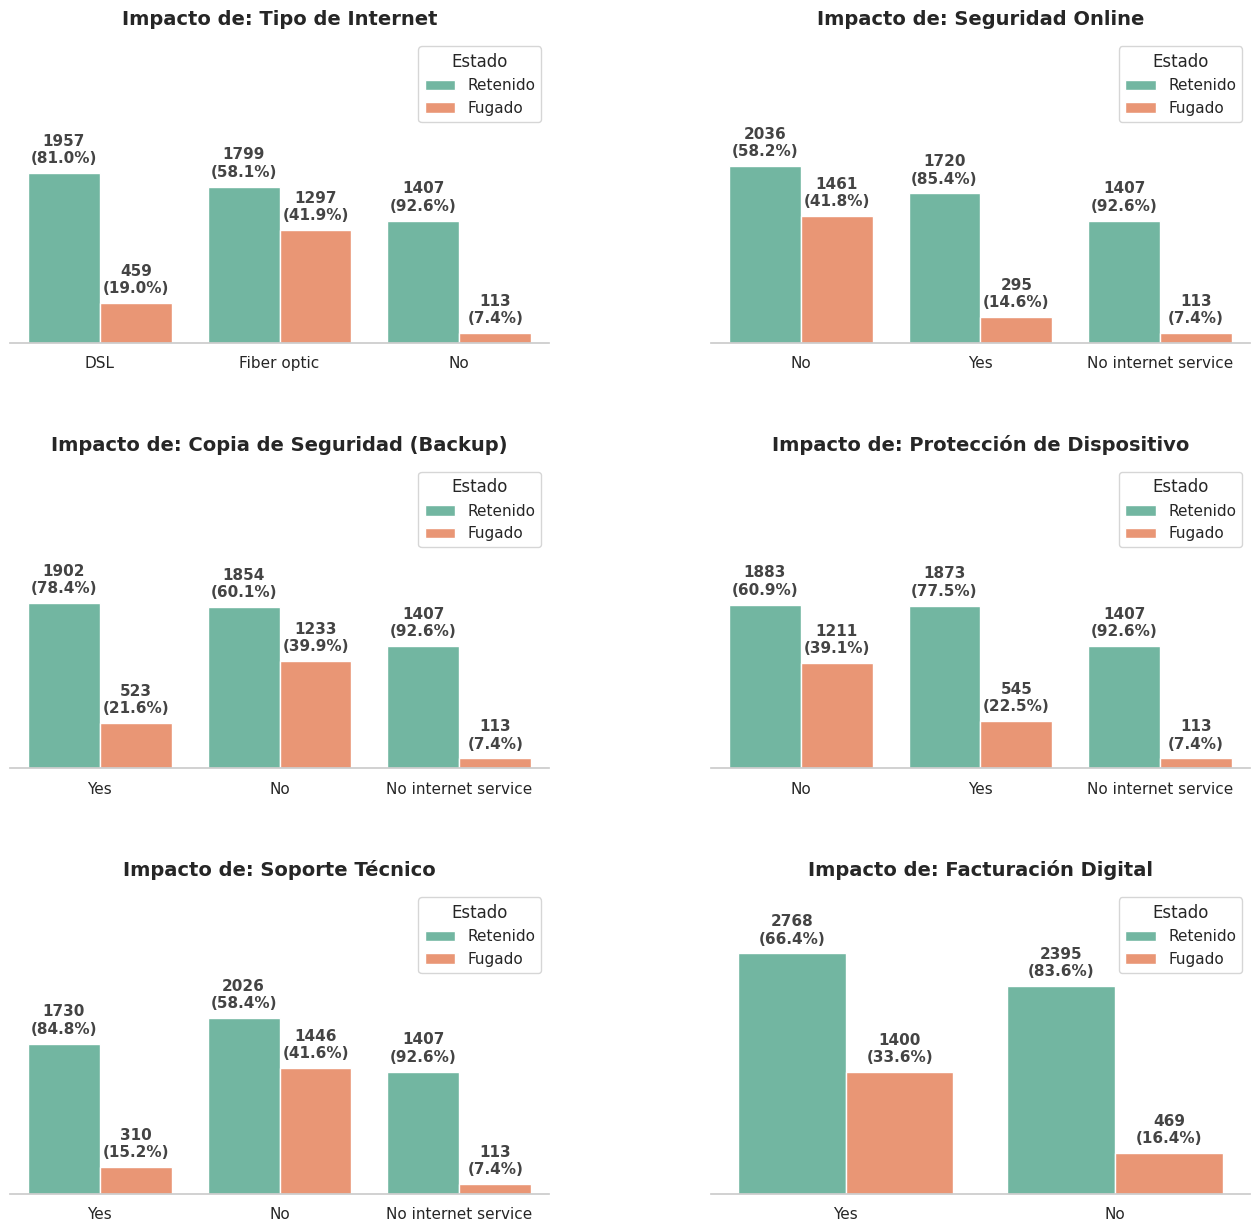

🌐 Tasa de Fuga por Tipo de Internet (%):
InternetService
DSL            18.998344
Fiber optic    41.892765
No              7.434211
Name: Churn, dtype: float64


In [ ]:
# --- GRÁFICO 9: ANÁLISIS DE SERVICIOS Y OPERACIONES ---

import matplotlib.pyplot as plt
import seaborn as sns

# --- GRÁFICO 9: ANÁLISIS DE SERVICIOS Y OPERACIONES (ESTILO PREMIUM) ---

# 1. Definimos las variables
cols_servicios = [
    'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'PaperlessBilling'
]

# Diccionario para títulos en español
titu_map = {
    'InternetService': 'Tipo de Internet',
    'OnlineSecurity': 'Seguridad Online',
    'OnlineBackup': 'Copia de Seguridad (Backup)',
    'DeviceProtection': 'Protección de Dispositivo',
    'TechSupport': 'Soporte Técnico',
    'PaperlessBilling': 'Facturación Digital'
}

plt.figure(figsize=(16, 15)) # Ajustamos altura para 3 filas

# Separación entre gráficos
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# 2. Bucle automático
for i, col in enumerate(cols_servicios, 1):
    ax = plt.subplot(3, 2, i)

    # Calculamos totales para los porcentajes
    total_por_categoria = df[col].value_counts()

    # Gráfico
    sns.countplot(x=col, hue='Churn', data=df, palette='Set2')

    # --- ESTÉTICA ---
    # Usamos el título en español del mapa
    titulo = titu_map.get(col, col)
    plt.title(f'Impacto de: {titulo}', fontsize=14, fontweight='bold', pad=10)
    plt.xlabel('')
    plt.ylabel('')

    # Fijamos el tope en 5000 (Para estas columnas suele ser suficiente)
    plt.ylim(0, 3500)

    # Limpieza visual
    ax.get_yaxis().set_visible(False)
    sns.despine(left=True)

    # Leyenda
    plt.legend(title='Estado', labels=['Retenido', 'Fugado'], loc='upper right')

    # --- ETIQUETAS (Valor + %) ---
    for p in ax.patches:
        height = p.get_height()

        if height > 0:
            # Obtener nombre de la categoría en eje X
            labels_x = [item.get_text() for item in ax.get_xticklabels()]
            idx_categoria = int(round(p.get_x() + p.get_width() / 2))

            if 0 <= idx_categoria < len(labels_x):
                nombre_categoria = labels_x[idx_categoria]

                # Protección y cálculo
                if nombre_categoria in total_por_categoria:
                    total_grupo = total_por_categoria[nombre_categoria]
                    porcentaje = (height / total_grupo) * 100

                    texto = f'{int(height)}\n({porcentaje:.1f}%)'

                    ax.annotate(texto,
                                (p.get_x() + p.get_width() / 2., height),
                                ha='center', va='bottom',
                                fontsize=11, color='#444444', fontweight='bold',
                                xytext=(0, 5), textcoords='offset points')

plt.show()

# 3. Datos Duros (Resumen rápido en texto)
print("🌐 Tasa de Fuga por Tipo de Internet (%):")
print(df.groupby('InternetService')['Churn'].mean() * 100)

In [ ]:
# --- DETECCIÓN DE OUTLIERS (Método del Rango Intercuartílico - IQR) ---

def detectar_outliers(df, columna):
    """
    Calcula y reporta outliers usando el método IQR (Tukey's Fences).
    """
    Q1 = df[columna].quantile(0.25) # El 25% más bajo
    Q3 = df[columna].quantile(0.75) # El 75% más bajo
    IQR = Q3 - Q1                   # Rango Intercuartílico

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]

    print(f"\n🧐 Análisis de Outliers para: {columna}\n")
    print(f"   - Límite Inferior: {limite_inferior:.2f}")
    print(f"   - Límite Superior: {limite_superior:.2f}")
    print(f"   - Total de Outliers detectados: {len(outliers)}")

    if len(outliers) > 0:
        print("  \n ⚠️ ¡Atención! Se encontraron valores atípicos.")
    else:
        print(" \n  ✅ Los datos están limpios de valores extremos.")

    return outliers

# Probamos con la columna de Cargos Totales
outliers_total = detectar_outliers(df, 'Charges.Total')

# Probamos con Cargos Mensuales
outliers_mensual = detectar_outliers(df, 'Charges.Monthly')


🧐 Análisis de Outliers para: Charges.Total

   - Límite Inferior: -4688.48
   - Límite Superior: 8884.67
   - Total de Outliers detectados: 0
 
  ✅ Los datos están limpios de valores extremos.

🧐 Análisis de Outliers para: Charges.Monthly

   - Límite Inferior: -45.82
   - Límite Superior: 171.27
   - Total de Outliers detectados: 0
 
  ✅ Los datos están limpios de valores extremos.


##Conteo de evasión por variables numéricas

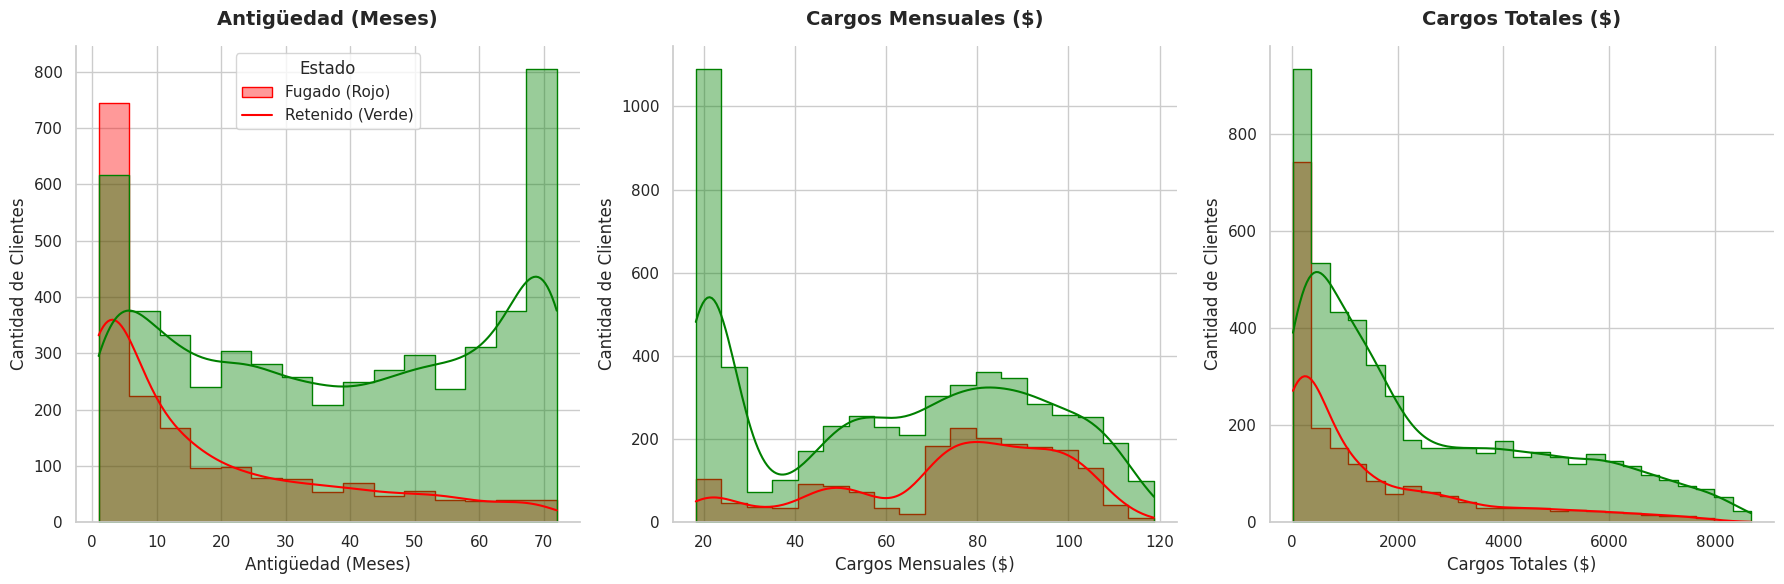

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- GRÁFICO 10: DISTRIBUCIÓN ESTILO CURVAS (CORREGIDO) ---

cols_numericas = ['tenure', 'Charges.Monthly', 'Charges.Total']
titulos_espanol = ['Antigüedad (Meses)', 'Cargos Mensuales ($)', 'Cargos Totales ($)']

plt.figure(figsize=(18, 6))

df_plot = df.copy()
df_plot['Status'] = df_plot['Churn'].map({0: 'Retenido', 1: 'Fugado'})

for i, (col, titulo) in enumerate(zip(cols_numericas, titulos_espanol), 1):
    ax = plt.subplot(1, 3, i)

    # TRUCO MAESTRO:
    # 1. hue_order=['Retenido', 'Fugado']: Obliga a dibujar primero el Verde (fondo) y luego el Rojo (encima).
    # 2. alpha=0.5: Hacemos los colores semi-transparentes para que se mezclen y se vean ambos.
    sns.histplot(data=df_plot, x=col, hue='Status', kde=True,
                 palette={'Retenido': 'green', 'Fugado': 'red'},
                 hue_order=['Retenido', 'Fugado'],
                 element="step",
                 alpha=0.4) # Transparencia clave

    # Estética limpia
    plt.title(f'{titulo}', fontsize=14, fontweight='bold', pad=15)
    plt.xlabel(titulo)
    plt.ylabel('Cantidad de Clientes')

    sns.despine()

    if i == 1:
        # Movemos la leyenda un poco para que no estorbe
        plt.legend(title='Estado', labels=['Fugado (Rojo)', 'Retenido (Verde)'])
    else:
        ax.get_legend().remove()

plt.tight_layout()
plt.show()

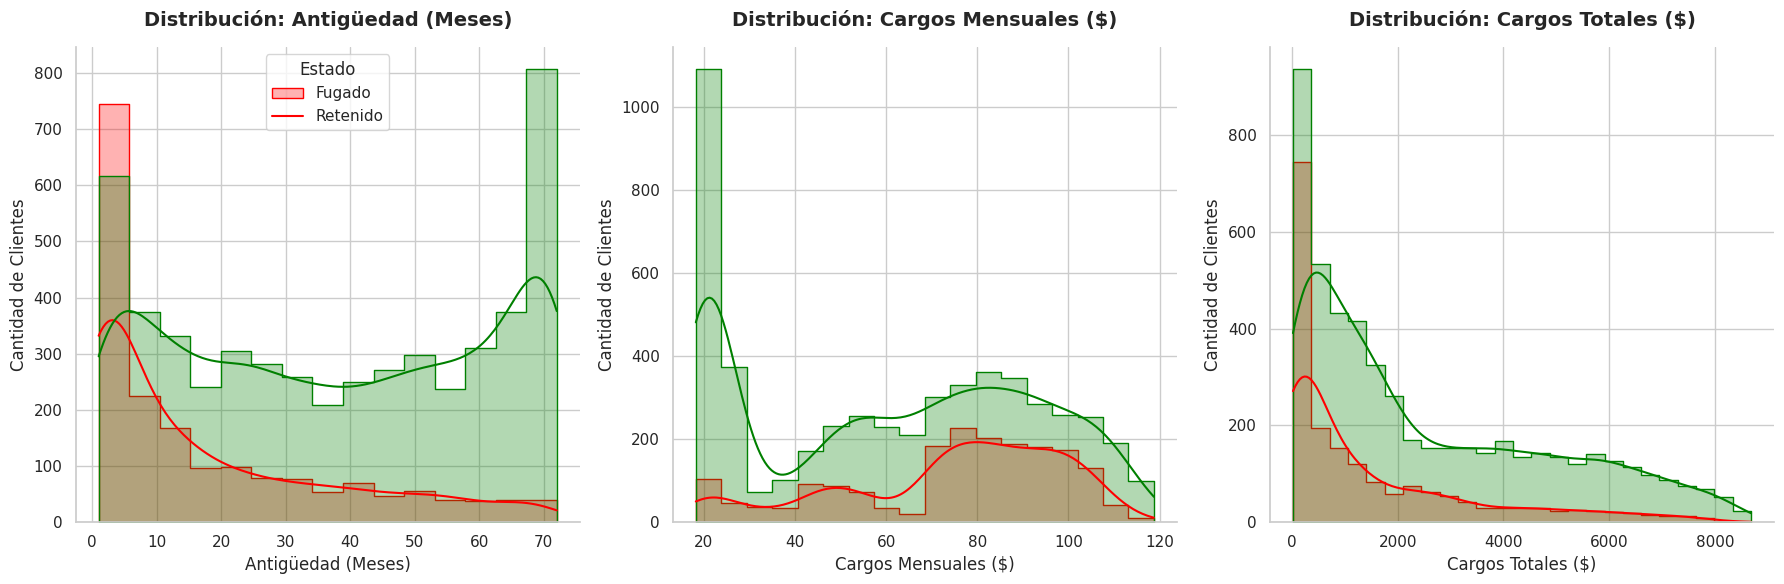

In [ ]:
# --- GRÁFICO 10: DISTRIBUCIÓN DE VARIABLES NUMÉRICAS (CORREGIDO Y ETIQUETADO) ---

import matplotlib.pyplot as plt
import seaborn as sns

# --- GRÁFICO 10: DISTRIBUCIÓN (ESTILO LIMPIO) ---

cols_numericas = ['tenure', 'Charges.Monthly', 'Charges.Total']
titulos_espanol = ['Antigüedad (Meses)', 'Cargos Mensuales ($)', 'Cargos Totales ($)']

plt.figure(figsize=(18, 6)) # Un poco más ancho

# Copia temporal para etiquetas bonitas en la leyenda
df_plot = df.copy()
df_plot['Status'] = df_plot['Churn'].map({0: 'Retenido', 1: 'Fugado'})

for i, (col, titulo) in enumerate(zip(cols_numericas, titulos_espanol), 1):
    ax = plt.subplot(1, 3, i)

    # Gráfico de Distribución
    # kde=True dibuja la línea curva suave encima de las barras
    sns.histplot(data=df_plot, x=col, hue='Status', kde=True,
                 palette={'Retenido': 'green', 'Fugado': 'red'},
                 element="step", alpha=0.3)

    # Estética
    plt.title(f'Distribución: {titulo}', fontsize=14, fontweight='bold', pad=15)
    plt.xlabel(titulo, fontsize=12)
    plt.ylabel('Cantidad de Clientes')

    # LIMPIEZA VISUAL (Despine)
    # Quitamos el borde superior y derecho, pero DEJAMOS el eje Y para referencia
    sns.despine()

    # Leyenda: Solo la mostramos en el primer gráfico para no repetir
    if i == 1:
        plt.legend(title='Estado', labels=['Fugado', 'Retenido'])
    else:
        # Quitamos la leyenda en los otros dos para que se vea limpio
        ax.get_legend().remove()

plt.tight_layout()
plt.show()

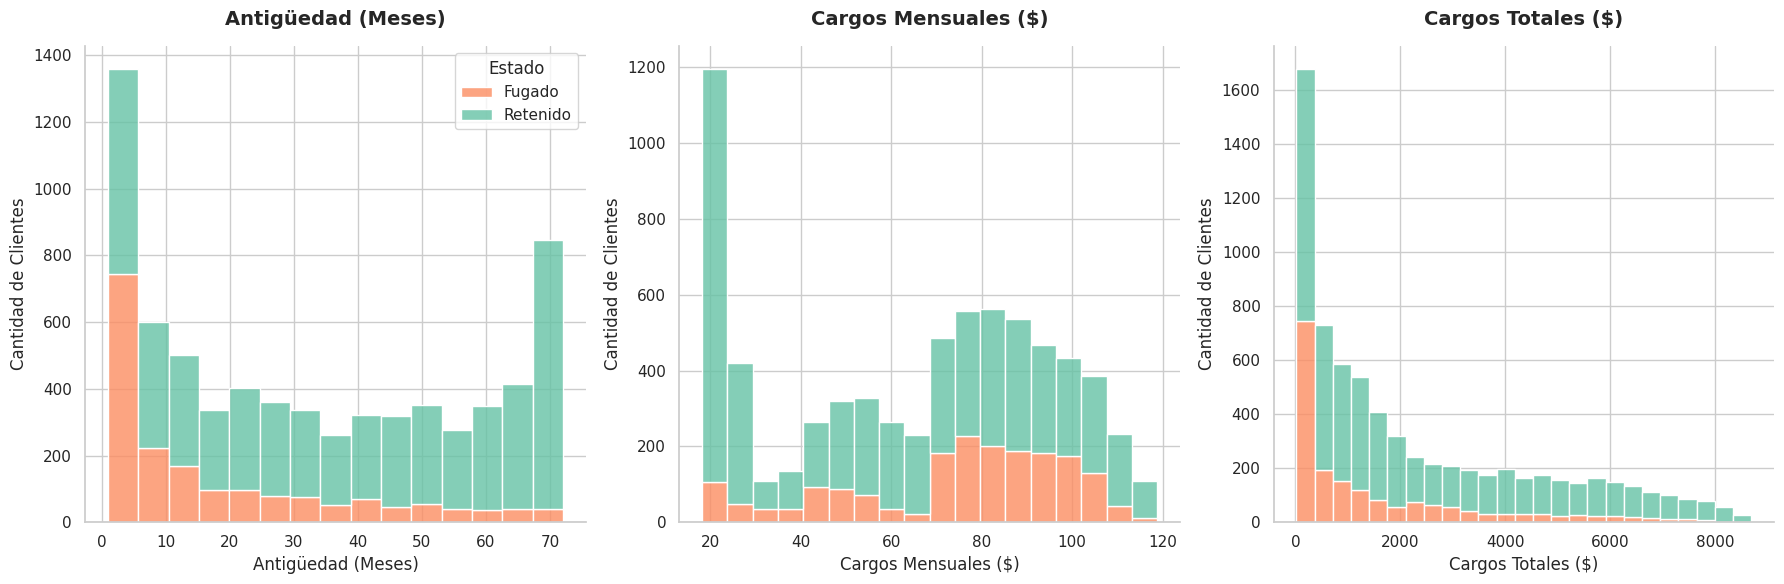

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- GRÁFICO 10: DISTRIBUCIÓN VISIBLE (CORREGIDO) ---

cols_numericas = ['tenure', 'Charges.Monthly', 'Charges.Total']
titulos_espanol = ['Antigüedad (Meses)', 'Cargos Mensuales ($)', 'Cargos Totales ($)']

plt.figure(figsize=(18, 6))

# Copia temporal
df_plot = df.copy()
df_plot['Status'] = df_plot['Churn'].map({0: 'Retenido', 1: 'Fugado'})

for i, (col, titulo) in enumerate(zip(cols_numericas, titulos_espanol), 1):
    ax = plt.subplot(1, 3, i)

    # CAMBIO CLAVE: multiple='stack'
    # Esto pone un color encima del otro, asegurando que ambos se vean.
    sns.histplot(data=df_plot, x=col, hue='Status',
                 palette={'Retenido': '#66c2a5', 'Fugado': '#fc8d62'}, # Colores suaves (Verde/Naranja)
                 multiple='stack',  # <--- ESTO ARREGLA EL PROBLEMA
                 edgecolor='white', # Líneas blancas para distinguir las barras
                 alpha=0.8)         # Un poco más sólido

    # Estética
    plt.title(f'{titulo}', fontsize=14, fontweight='bold', pad=15)
    plt.xlabel(titulo)
    plt.ylabel('Cantidad de Clientes')

    # Limpieza
    sns.despine()

    # Leyenda inteligente (solo en el primero)
    if i == 1:
        plt.legend(title='Estado', labels=['Fugado', 'Retenido'])
    else:
        ax.get_legend().remove()

plt.tight_layout()
plt.show()

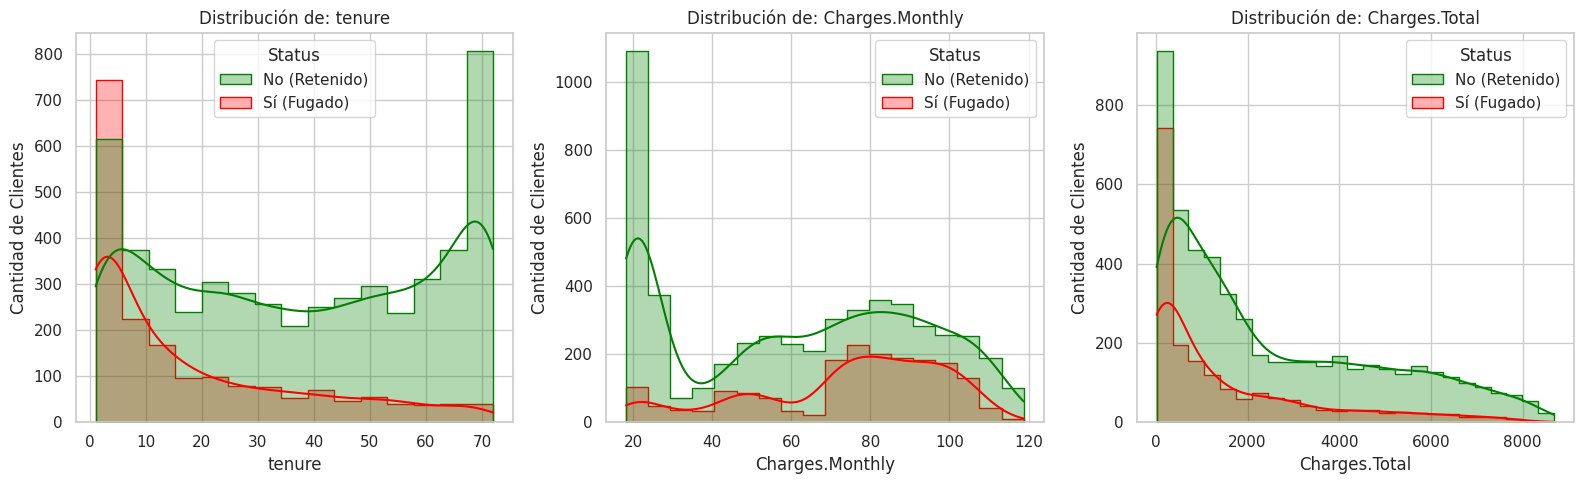

In [ ]:
# --- GRÁFICO 10: DISTRIBUCIÓN DE VARIABLES NUMÉRICAS (CORREGIDO Y ETIQUETADO) ---

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Crear una copia temporal para no dañar tus datos numéricos originales
df_plot = df.copy()

# 2. Mapear 0 y 1 a textos legibles para que la leyenda salga bonita automática
df_plot['Status'] = df_plot['Churn'].map({0: 'No (Retenido)', 1: 'Sí (Fugado)'})

cols_numericas = ['tenure', 'Charges.Monthly', 'Charges.Total']
# Definimos los colores exactos para cada etiqueta
colores = {'No (Retenido)': 'green', 'Sí (Fugado)': 'red'}

plt.figure(figsize=(16, 5))

for i, col in enumerate(cols_numericas, 1):
    plt.subplot(1, 3, i)

    # Usamos la nueva columna 'Status' para el color (hue)
    sns.histplot(data=df_plot, x=col, hue='Status', kde=True,
                 palette=colores,
                 element="step", alpha=0.3)

    plt.title(f'Distribución de: {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Cantidad de Clientes')

plt.tight_layout()
plt.show()

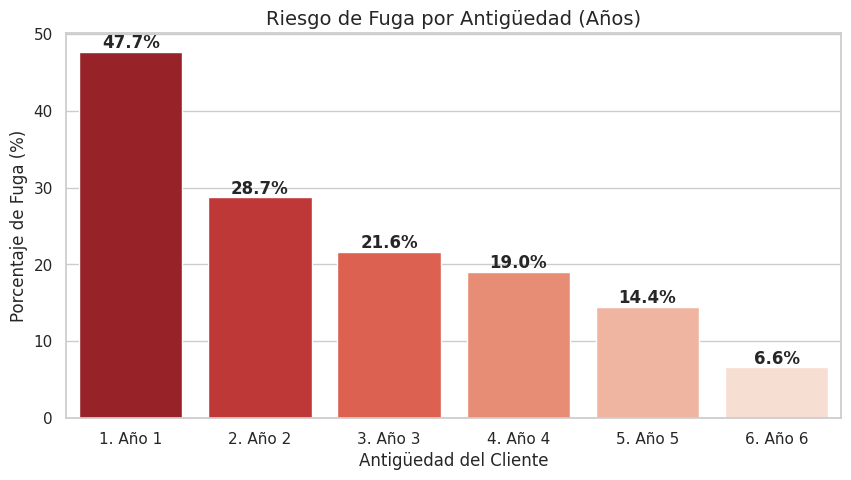

In [ ]:
# --- GRÁFICO 11: ANÁLISIS POR RANGOS (Cohortes de Antigüedad) ---

# 1. Crear rangos de antigüedad (cada 12 meses = 1 año)
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['1. Año 1', '2. Año 2', '3. Año 3', '4. Año 4', '5. Año 5', '6. Año 6']

# Creamos la nueva columna de grupos
df['Grupo_Antiguedad'] = pd.cut(df['tenure'], bins=bins, labels=labels)

# 2. Calcular la tasa de fuga por grupo
fuga_por_anio = df.groupby('Grupo_Antiguedad')['Churn'].mean() * 100

# 3. Visualizarlo
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=fuga_por_anio.index, y=fuga_por_anio.values, palette='Reds_r')

plt.title('Riesgo de Fuga por Antigüedad (Años)', fontsize=14)
plt.ylabel('Porcentaje de Fuga (%)')
plt.xlabel('Antigüedad del Cliente')

# Poner los números encima de las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.show()

##¡Extra! Análisis de correlación entre variables

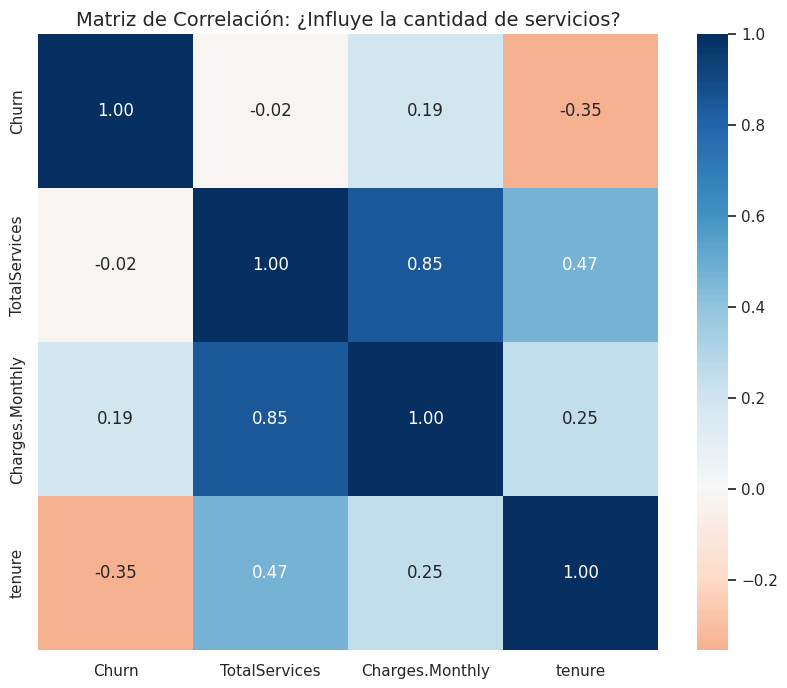

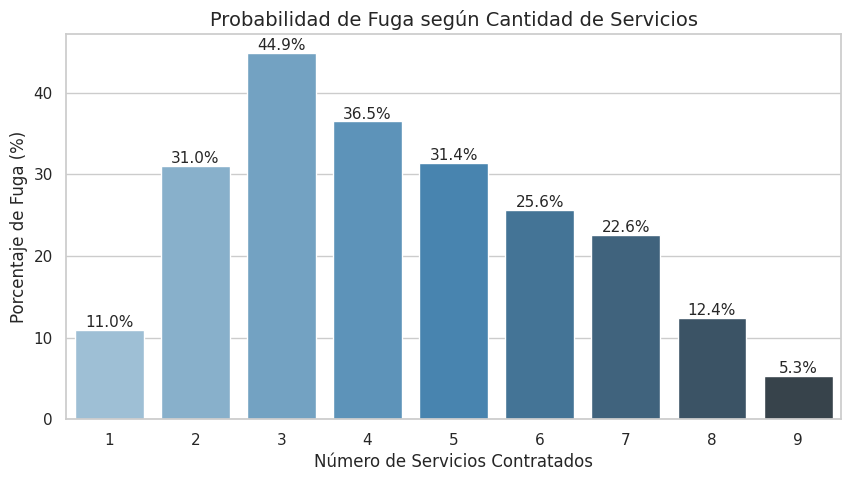


📉  Correlación entre Cantidad de Servicios y Fuga: -0.020



In [ ]:
# --- GRÁFICO 12: ANÁLISIS EXTRA: CORRELACIÓN Y EFECTO DE SERVICIOS ---

# 1. Crear variable 'TotalServices' (Conteo de servicios contratados)
# Lista de columnas que representan un servicio adicional
cols_servicios = [
    'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Truco: Sumamos 1 por cada columna que tenga 'Yes'
# (Y sumamos InternetService si es distinto de 'No')
df['TotalServices'] = (df[cols_servicios] == 'Yes').sum(axis=1) + (df['InternetService'] != 'No').astype(int)

# 2. Matriz de Correlación Específica
# Seleccionamos las variables clave para no llenar el gráfico de ruido
vars_interes = ['Churn', 'TotalServices', 'Charges.Monthly', 'tenure']
matriz_corr = df[vars_interes].corr()

# Visualización 1: Mapa de Calor
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_corr, annot=True, cmap='RdBu', center=0, fmt=".2f")
plt.title('Matriz de Correlación: ¿Influye la cantidad de servicios?', fontsize=14)
plt.show()
print(f"\n \n")
# 3. Visualización 2: Tasa de Fuga por Cantidad de Servicios
# Este gráfico nos dirá la verdad clara
tasa_servicios = df.groupby('TotalServices')['Churn'].mean() * 100

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=tasa_servicios.index, y=tasa_servicios.values, palette='Blues_d')

plt.title('Probabilidad de Fuga según Cantidad de Servicios', fontsize=14)
plt.xlabel('Número de Servicios Contratados')
plt.ylabel('Porcentaje de Fuga (%)')

# Etiquetas
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=11)

plt.show()

# Interpretación numérica
corr_serv = df['TotalServices'].corr(df['Churn'])
print(f"\n📉  Correlación entre Cantidad de Servicios y Fuga: {corr_serv:.3f}\n")

#📄Informe final

📊 Informe Final: Análisis de Evasión de Clientes (Churn) - Telecom X

**1. Introducción**

**Objetivo**: El propósito de este proyecto es analizar los datos de comportamiento de los clientes de Telecom X para identificar los factores clave que impulsan la cancelación de servicios (Churn). La empresa enfrenta una tasa de deserción significativa, y el objetivo es proporcionar al equipo de Data Science y a la gerencia insights accionables para mejorar la retención.

**El Problema**: La evasión de clientes impacta directamente en los ingresos recurrentes. Entender si la fuga se debe a precios, calidad del servicio o falta de compromiso contractual es vital para diseñar estrategias de fidelización efectivas.

**2. Metodología: Limpieza y Tratamiento de Datos**

Para garantizar la fiabilidad del análisis, se ejecutó un proceso riguroso de ETL (Extracción, Transformación y Carga):

  * 2.1 **Extracción y Aplanado**: Se consumieron los datos desde una API en formato JSON. Dado que los datos contenían estructuras anidadas (diccionarios dentro de columnas), se aplicó una técnica de normalización (json_normalize) para "aplanar" la estructura y obtener un DataFrame tabular de 21 columnas.

  * 2.2 **Conversión de Tipos**:
    * Se transformó Charges.Total de texto a numérico, gestionando los valores vacíos.

    * Se convirtió la variable objetivo Churn a formato binario (0 = No, 1 = Sí) para facilitar el análisis estadístico.

  * 2.3 **Ingeniería de Características (Feature Engineering)**:
    * Se creó la variable Charges.Daily para estimar el gasto diario.

    * Se generó la variable TotalServices para medir la cantidad de productos contratados por cliente.

    * Se segmentó la antigüedad (tenure) en rangos anuales para analizar cohortes de riesgo.

  * 2.4 **Calidad de Datos**: Se verificó la ausencia de duplicados y se estandarizaron las categorías de texto.

**3. Análisis Exploratorio de Datos (EDA)**

A través de visualizaciones univariadas y multivariadas, se detectaron los siguientes patrones de comportamiento:

  * **Magnitud de la Fuga**: La Tasa de Churn global es del 26.5%.

  * **Factor Contractual**: Existe una relación directa entre el tipo de contrato y la fuga. Los clientes con contrato "Mes a mes" representan la inmensa mayoría de las cancelaciones, mientras que los contratos de 1 y 2 años muestran una fidelidad casi total.

  * **Comportamiento de Pago**: Los usuarios que pagan mediante Cheque Electrónico tienen una tasa de deserción inusualmente alta en comparación con tarjeta de crédito o transferencia automática.

  * **Servicios Críticos**: El servicio de Fibra Óptica presenta una tasa de cancelación superior al 40%, mucho más alta que el servicio DSL, lo que sugiere problemas de satisfacción (precio o calidad técnica) en este producto específico.

  * **Antigüedad:** La "zona de peligro" se encuentra en los primeros 12 meses. Si el cliente supera el primer año, la probabilidad de fuga cae drásticamente.

**4. Conclusiones e Insights Clave**

  * **El Perfil del "Cliente Fugitivo"**

  El análisis nos permite dibujar el perfil exacto del cliente con mayor riesgo de irse:

      * "Cliente nuevo (menos de 1 año), con contrato mensual, usuario de Fibra Óptica, que paga con Cheque Electrónico y no tiene servicios adicionales de seguridad o soporte."

  * **El "Efecto Ancla" (Validado)**

  Se descubrió una correlación negativa entre la cantidad de servicios y la evasión.

      * Clientes con 1 solo servicio son altamente volátiles.

      * Clientes con 3 o más servicios (ej. Internet + TV + Seguridad) muestran una retención mucho mayor. Cuantos más productos tiene el cliente, mayores son sus barreras de salida.

  * **Sensibilidad al Precio**
  
  Los clientes con mayores Cargos Mensuales y Diarios tienden a cancelar más. Esto indica que el segmento "Premium" es el más frágil y exigente; si el servicio no justifica el precio alto, se van rápidamente.

**5. Recomendaciones Estratégicas**

Basado en los datos, se sugieren las siguientes acciones para reducir la evasión:

  * **Campaña de "Primer Año"**: Implementar un programa de onboarding agresivo durante los primeros 12 meses (descuentos progresivos o atención personalizada) para ayudar al cliente a superar la "curva de riesgo" del primer año.

  * **Migración de Contratos**: Incentivar a los usuarios de "Mes a mes" a firmar contratos anuales ofreciendo beneficios tangibles (ej. "Firma por 1 año y te congelamos el precio").

  * **Auditoría de Fibra Óptica**: Investigar urgentemente la experiencia de usuario en Fibra Óptica. ¿Hay fallas técnicas recurrentes? ¿Es el precio competitivo? Se recomienda una encuesta de satisfacción específica para este segmento.

  * **Estrategia de Venta Cruzada (Cross-Selling)**: Dejar de vender servicios aislados. Empaquetar el Internet con servicios de "bajo costo" para la empresa pero "alto valor" para la retención (como OnlineSecurity o TechSupport) para activar el "Efecto Ancla".

In [ ]:
#NO
print("ℹ️ Tipos de datos corregidos:")
print(df_limpio[['Charges.Total', 'Churn']].info())

print("\n🔍 ¿Aparecieron nulos ahora?")
print(df_limpio.isnull().sum())

ℹ️ Tipos de datos corregidos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Charges.Total  7267 non-null   object
 1   Churn          7267 non-null   object
dtypes: object(2)
memory usage: 113.7+ KB
None

🔍 ¿Aparecieron nulos ahora?
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


In [ ]:
#NO
# --- CORRECCIÓN DE TIPOS DE DATOS ---

# 1. Convertir Charges.Total a numérico
# errors='coerce' transforma lo que no sea número en NaN (Not a Number)
df_limpio['Charges.Total'] = pd.to_numeric(df_limpio['Charges.Total'], errors='coerce')

# 2. Convertir Churn a binario (0 y 1)
# Esto facilitará el análisis de correlación más adelante
# Mapeamos: 'Yes' -> 1, 'No' -> 0
df_limpio['Churn'] = df_limpio['Churn'].map({'Yes': 1, 'No': 0})

# 3. Verificamos nuevamente la información
print("ℹ️ Tipos de datos corregidos:")
print(df_limpio[['Charges.Total', 'Churn']].info())

print("\n🔍 ¿Aparecieron nulos ahora?")
print(df_limpio.isnull().sum())

ℹ️ Tipos de datos corregidos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Charges.Total  7256 non-null   float64
 1   Churn          7043 non-null   float64
dtypes: float64(2)
memory usage: 113.7 KB
None

🔍 ¿Aparecieron nulos ahora?
customerID            0
Churn               224
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
Charges.Monthly       0
Charges.Total        11
dtype: int64


In [ ]:
#NO
# --- LIMPIEZA DEFINITIVA ---

# 1. Eliminamos filas donde el Churn esté vacío ''
# (Filtramos solo los que sean diferentes a vacío)
df_limpio = df_limpio[df_limpio['Churn'] != '']

# 2. Ahora sí, convertimos Churn a números (0 y 1)
df_limpio['Churn'] = df_limpio['Churn'].map({'Yes': 1, 'No': 0})

# 3. Convertimos Charges.Total a numérico (los vacíos se vuelven NaN)
df_limpio['Charges.Total'] = pd.to_numeric(df_limpio['Charges.Total'], errors='coerce')

# 4. Eliminamos los pocos NaN que quedaron en Charges.Total (eran 11)
df_limpio = df_limpio.dropna(subset=['Charges.Total'])

# --- VERIFICACIÓN FINAL ---
print("✨ Dataset Limpio y Listo:")
print(df_limpio.info())

print("\n📊 Distribución final de Churn:")
print(df_limpio['Churn'].value_counts())

✨ Dataset Limpio y Listo:
<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7256 non-null   object 
 1   Churn             0 non-null      float64
 2   gender            7256 non-null   object 
 3   SeniorCitizen     7256 non-null   int64  
 4   Partner           7256 non-null   object 
 5   Dependents        7256 non-null   object 
 6   tenure            7256 non-null   int64  
 7   PhoneService      7256 non-null   object 
 8   MultipleLines     7256 non-null   object 
 9   InternetService   7256 non-null   object 
 10  OnlineSecurity    7256 non-null   object 
 11  OnlineBackup      7256 non-null   object 
 12  DeviceProtection  7256 non-null   object 
 13  TechSupport       7256 non-null   object 
 14  StreamingTV       7256 non-null   object 
 15  StreamingMovies   7256 non-null   object 
 16  Contract          725

In [ ]:
#NO
# Guardar en la carpeta processed que creamos antes
ruta_guardado = '/content/TelecomX_Churn_Project/data/processed/telecom_churn_clean.csv'
# index=False para no guardar el número de fila como columna extra
df_limpio.to_csv(ruta_guardado, index=False)

print(f"💾 Archivo procesado guardado en: {ruta_guardado}")

💾 Archivo procesado guardado en: /content/TelecomX_Churn_Project/data/processed/telecom_churn_clean.csv


In [ ]:
#NO
# 1. Generamos el resumen estadístico
resumen_diario = df.groupby('Status_Cliente')['Charges.Daily'].describe()

# 2. Definimos el formato:
# - 'count': Sin decimales (son personas)
# - Las demás columnas: Signo $ y 2 decimales
formato = {
    'count': '{:,.0f}',      # Ejemplo: 1,200
    'mean': '${:,.2f}',      # Ejemplo: $2.50
    'std': '${:,.2f}',
    'min': '${:,.2f}',
    '25%': '${:,.2f}',
    '50%': '${:,.2f}',
    '75%': '${:,.2f}',
    'max': '${:,.2f}'
}

# 3. Aplicamos el estilo (solo visual)
print("📊 Detalle Financiero del Gasto Diario:")
display(resumen_diario.style.format(formato))

📊 Detalle Financiero del Gasto Diario:


,count,mean,std,min,25%,50%,75%,max
Status_Cliente,,,,,,,,
Cliente Fugado,"1,869",$2.48,$0.82,$0.63,$1.87,$2.66,$3.14,$3.94
Cliente Retenido,"5,163",$2.04,$1.04,$0.61,$0.84,$2.15,$2.95,$3.96


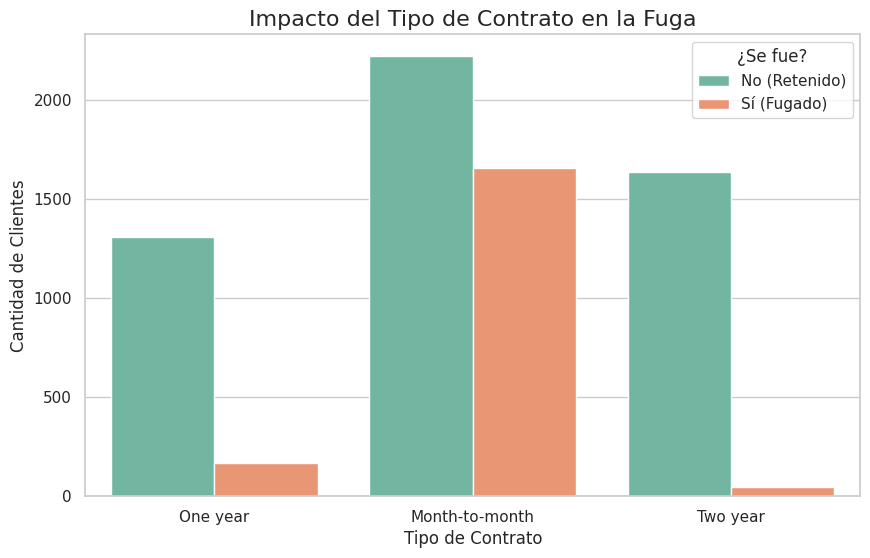

Contract
Month-to-month    42.709677
One year          11.277174
Two year           2.848665
Name: Churn, dtype: float64


In [ ]:
# --- GRÁFICO 2: RELACIÓN ENTRE TIPO DE CONTRATO Y FUGA ---

plt.figure(figsize=(10, 6))

# Creamos un gráfico de barras agrupado
sns.countplot(x='Contract', hue='Churn', data=df, palette='Set2')

plt.title('Impacto del Tipo de Contrato en la Fuga', fontsize=16)
plt.xlabel('Tipo de Contrato', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)
plt.legend(title='¿Se fue?', labels=['No (Retenido)', 'Sí (Fugado)'])

plt.show()

# Verificamos los números crudos
print(df.groupby('Contract')['Churn'].mean() * 100)

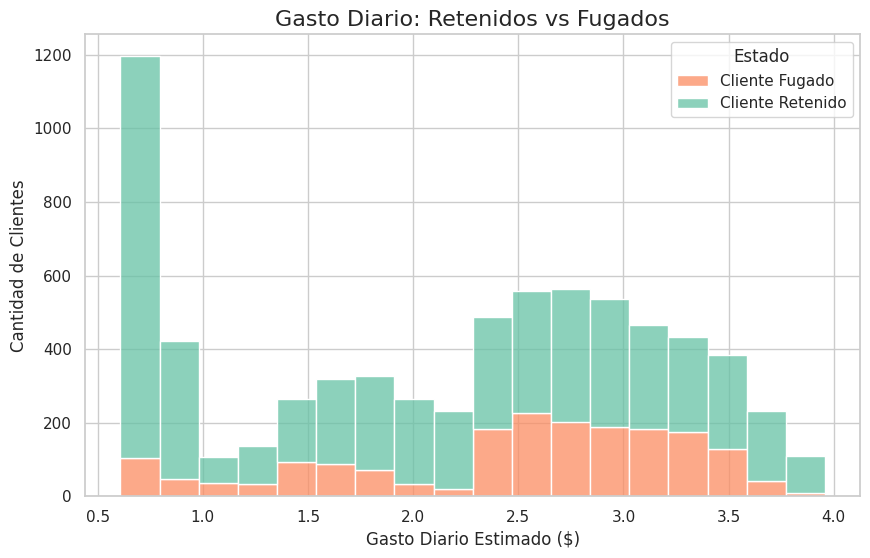


📊 Resumen del Gasto Diario ($):



,count,mean,std,min,25%,50%,75%,max
Status_Cliente,,,,,,,,
Cliente Fugado,"1,869",$2.48,$0.82,$0.63,$1.87,$2.66,$3.14,$3.94
Cliente Retenido,"5,163",$2.04,$1.04,$0.61,$0.84,$2.15,$2.95,$3.96


In [ ]:
#Creando la Variable "Cuentas Diarias"
# --- GRÁFICO 3: ANÁLISIS GASTO DIARIO ---

import matplotlib.pyplot as plt
import seaborn as sns


# 1. Verificamos si la columna existe. Si no, la creamos de nuevo.
if 'Charges.Daily' not in df.columns:
    #print("⚠️ La columna 'Charges.Daily' no existía. Creándola ahora...")
    df['Charges.Daily'] = df['Charges.Monthly'] / 30

# 2. Aseguramos que 'Status_Cliente' se genere bien
# (Mapeamos asegurando que Churn sea numérico 0 y 1)
df['Status_Cliente'] = df['Churn'].map({0: 'Cliente Retenido', 1: 'Cliente Fugado'})

# --- GRÁFICO ---
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='Charges.Daily', hue='Status_Cliente',
             multiple='stack',
             palette={'Cliente Retenido': '#66c2a5', 'Cliente Fugado': '#fc8d62'})

plt.title('Gasto Diario: Retenidos vs Fugados', fontsize=16)
plt.xlabel('Gasto Diario Estimado ($)', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)
# Forzamos la leyenda para evitar errores si alguna categoría está vacía
plt.legend(title='Estado', labels=['Cliente Fugado', 'Cliente Retenido'])

plt.show()

# --- ESTADÍSTICAS ---
print("\n📊 Resumen del Gasto Diario ($):\n")
#display(df.groupby('Status_Cliente')['Charges.Daily'].describe())

resumen_diario = df.groupby('Status_Cliente')['Charges.Daily'].describe()

# 3. Definimos el formato:
# - 'count': Sin decimales (son personas)
# - Las demás columnas: Signo $ y 2 decimales
formato = {
    'count': '{:,.0f}',      # Ejemplo: 1,200
    'mean': '${:,.2f}',      # Ejemplo: $2.50
    'std': '${:,.2f}',
    'min': '${:,.2f}',
    '25%': '${:,.2f}',
    '50%': '${:,.2f}',
    '75%': '${:,.2f}',
    'max': '${:,.2f}'
}

# 4. Aplicamos el estilo (solo visual)
#print("📊 Detalle Financiero del Gasto Diario:")
display(resumen_diario.style.format(formato))



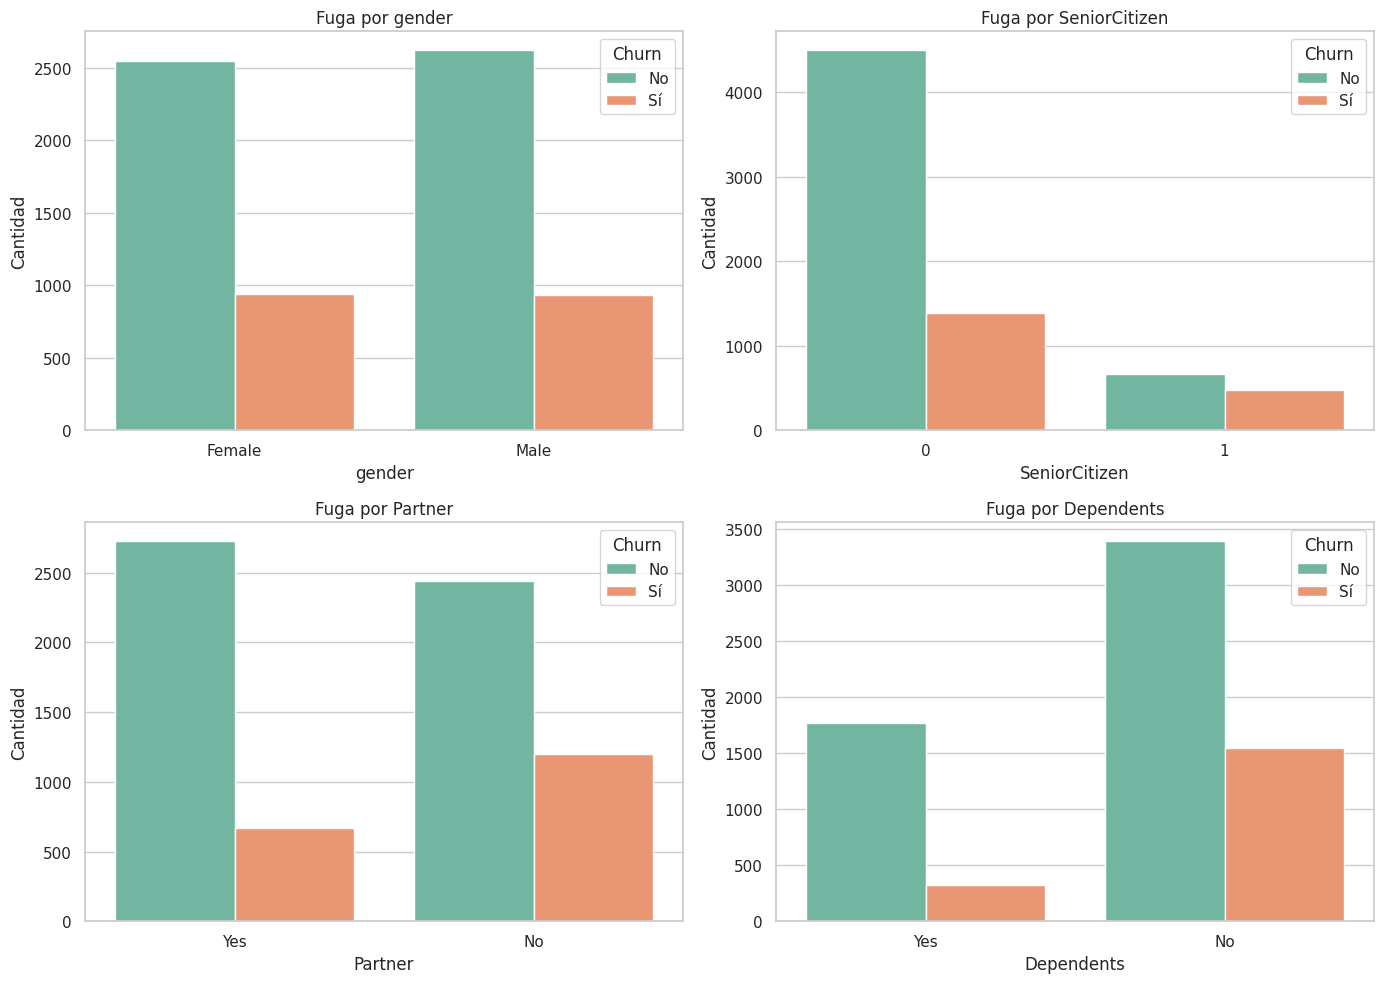

In [ ]:
# --- GRÁFICO 7: ANÁLISIS DEMOGRÁFICO ---

# Definimos las 4 variables demográficas
cols_demo = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

plt.figure(figsize=(14, 10))

# Bucle para crear 4 gráficos en una sola imagen (2x2)
for i, col in enumerate(cols_demo, 1):
    plt.subplot(2, 2, i)

    # Creamos el gráfico
    sns.countplot(x=col, hue='Churn', data=df, palette='Set2')

    # Estética
    plt.title(f'Fuga por {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Cantidad')
    plt.legend(title='Churn', labels=['No', 'Sí'])

plt.tight_layout()
plt.show()

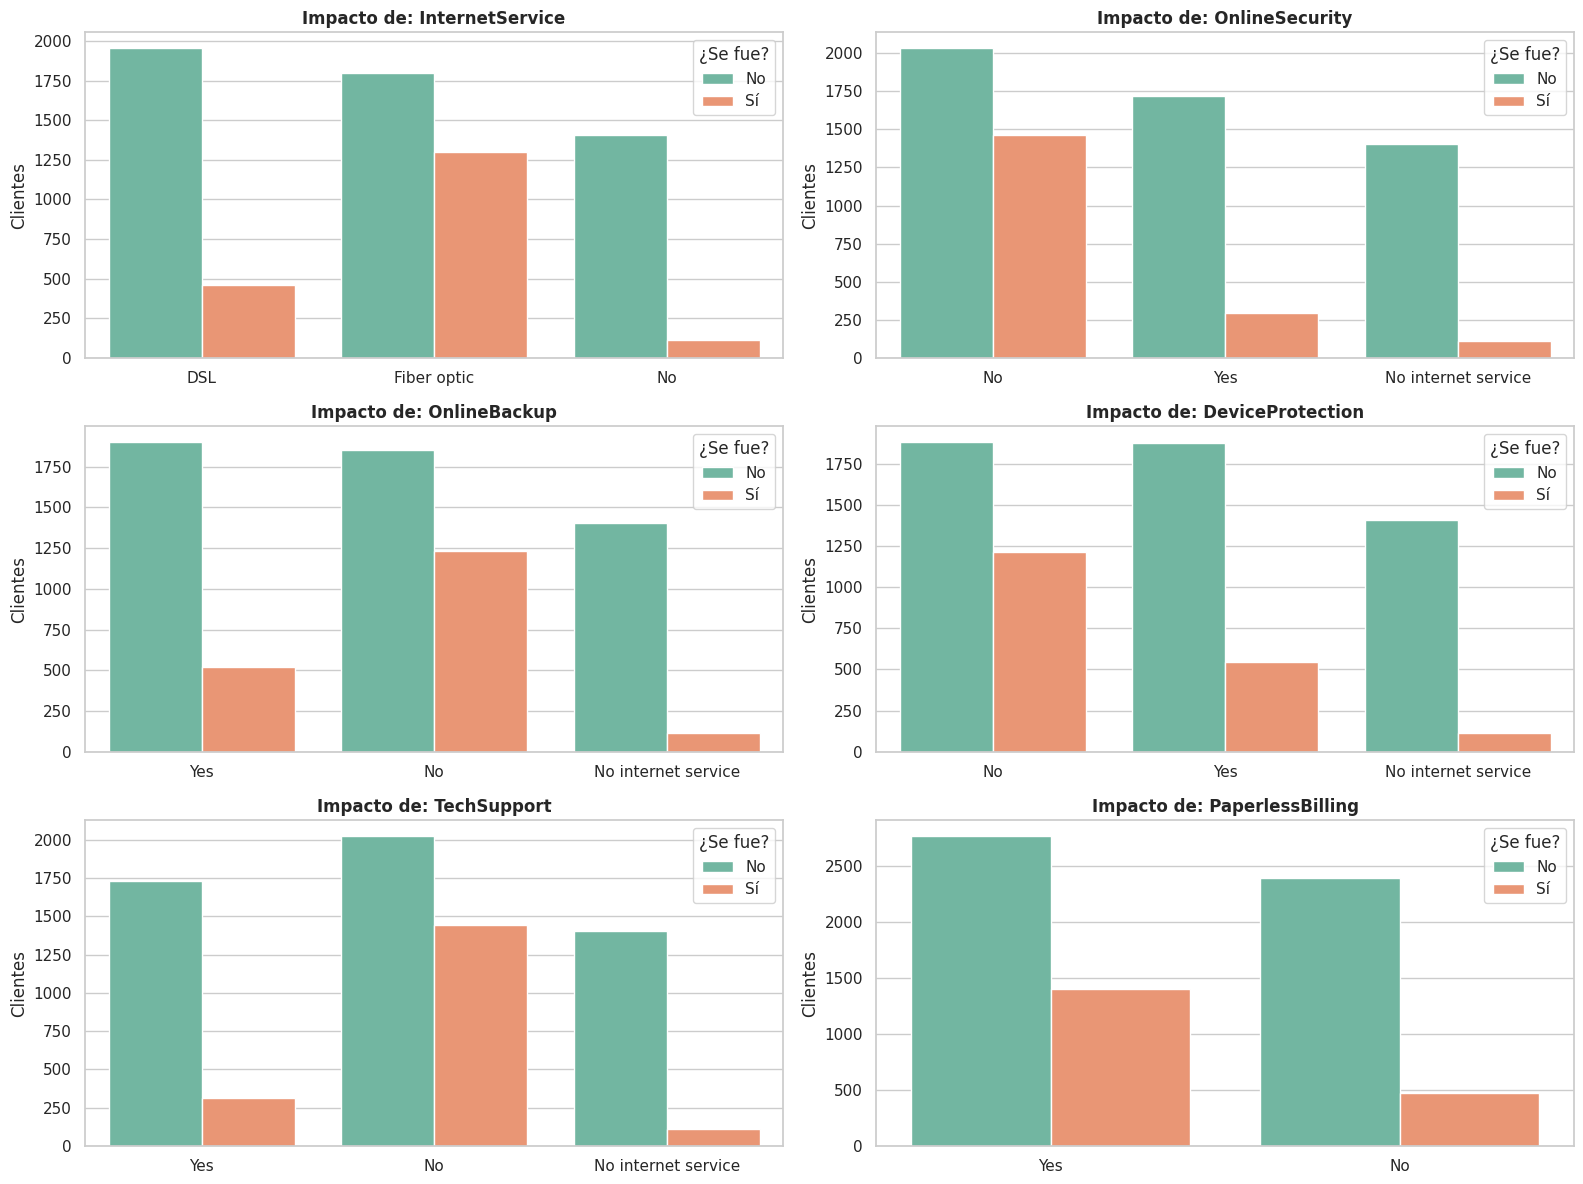

🌐 Tasa de Fuga por Tipo de Internet:
InternetService
DSL            18.998344
Fiber optic    41.892765
No              7.434211
Name: Churn, dtype: float64


In [ ]:
# --- GRÁFICO 8: ANÁLISIS DE SERVICIOS Y OPERACIONES ---

# 1. Definimos las variables de servicios que queremos analizar
cols_servicios = [
    'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'PaperlessBilling'
]

plt.figure(figsize=(16, 12))

# 2. Bucle automático para crear los gráficos
for i, col in enumerate(cols_servicios, 1):
    plt.subplot(3, 2, i) # Crear una cuadrícula de 3 filas x 2 columnas

    # Gráfico de barras
    sns.countplot(x=col, hue='Churn', data=df, palette='Set2')

    # Estética
    plt.title(f'Impacto de: {col}', fontsize=12, fontweight='bold')
    plt.xlabel('') # Quitamos la etiqueta X para que no ensucie
    plt.ylabel('Clientes')
    plt.legend(title='¿Se fue?', labels=['No', 'Sí'], loc='upper right')

plt.tight_layout()
plt.show()

# 3. Datos Duros (Churn Rate por categoría de Internet)
print("🌐 Tasa de Fuga por Tipo de Internet:")
print(df.groupby('InternetService')['Churn'].mean() * 100)

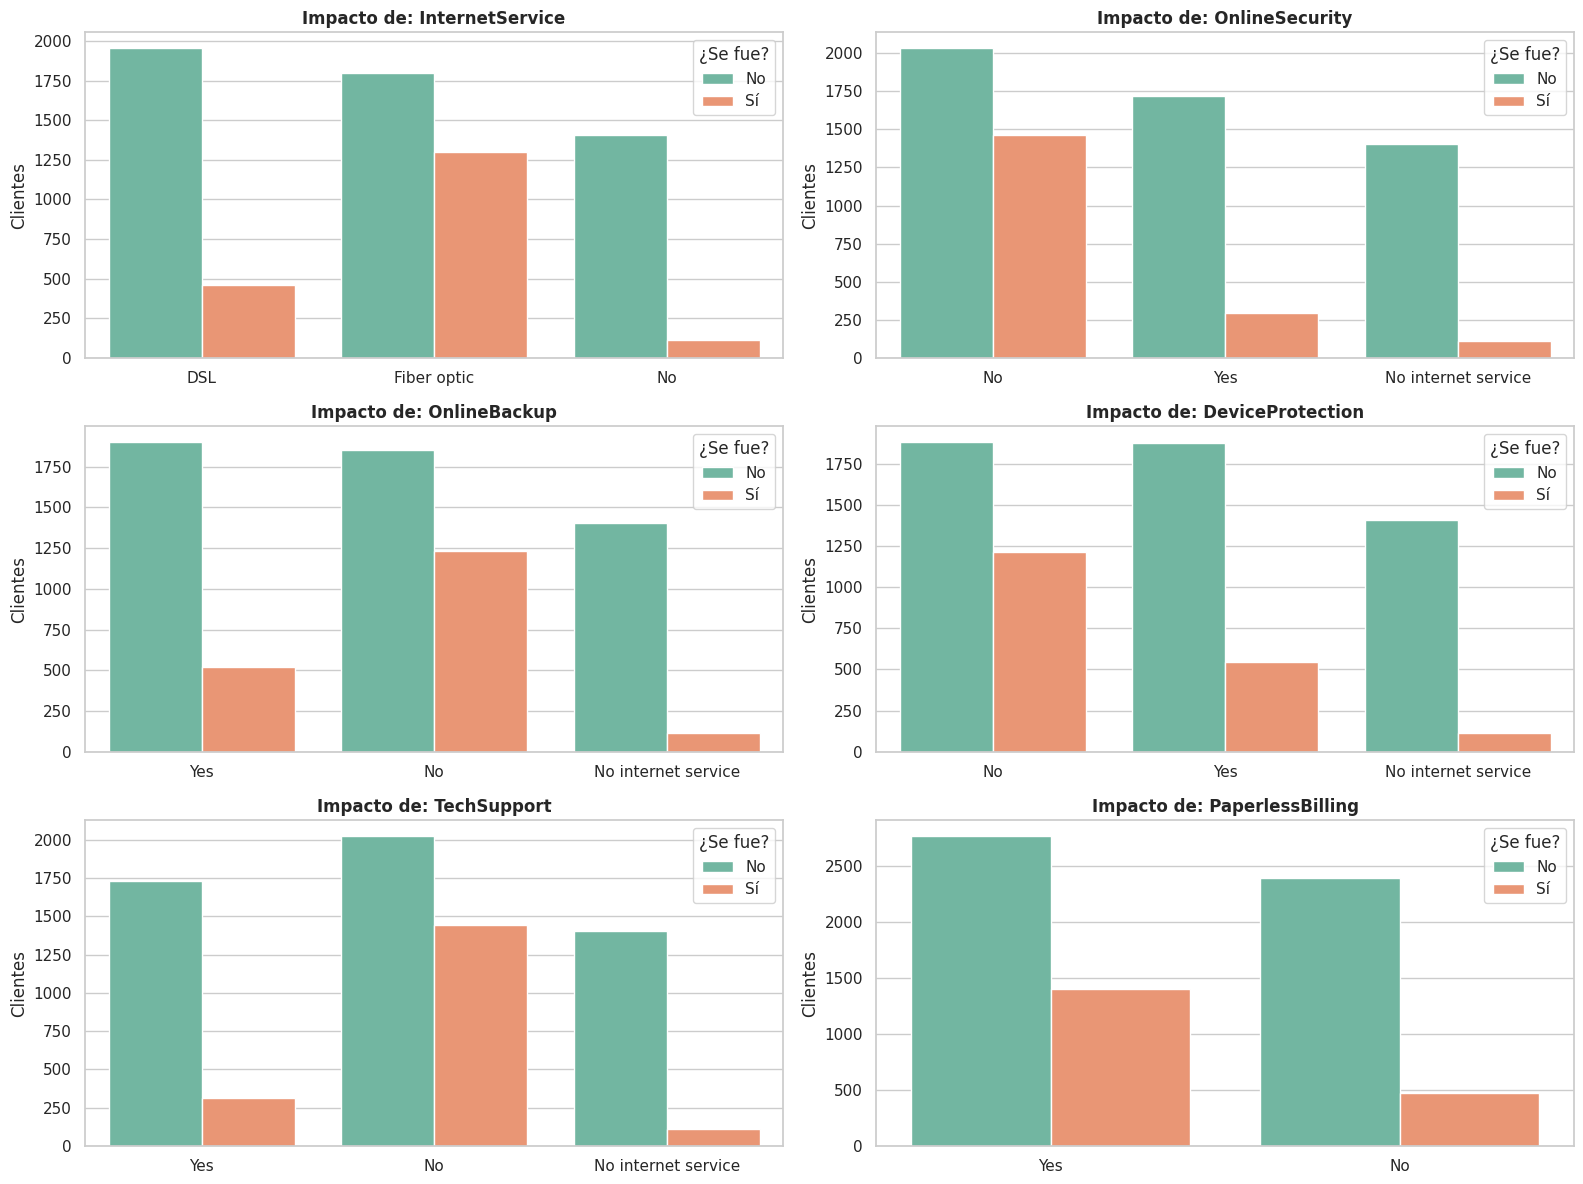

🌐 Tasa de Fuga por Tipo de Internet:
InternetService
DSL            18.998344
Fiber optic    41.892765
No              7.434211
Name: Churn, dtype: float64


In [ ]:
# --- GRÁFICO 9: ANÁLISIS DE SERVICIOS Y OPERACIONES ---

# 1. Definimos las variables de servicios que queremos analizar
cols_servicios = [
    'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'PaperlessBilling'
]

plt.figure(figsize=(16, 12))

# 2. Bucle automático para crear los gráficos
for i, col in enumerate(cols_servicios, 1):
    plt.subplot(3, 2, i) # Crear una cuadrícula de 3 filas x 2 columnas

    # Gráfico de barras
    sns.countplot(x=col, hue='Churn', data=df, palette='Set2')

    # Estética
    plt.title(f'Impacto de: {col}', fontsize=12, fontweight='bold')
    plt.xlabel('') # Quitamos la etiqueta X para que no ensucie
    plt.ylabel('Clientes')
    plt.legend(title='¿Se fue?', labels=['No', 'Sí'], loc='upper right')

plt.tight_layout()
plt.show()

# 3. Datos Duros (Churn Rate por categoría de Internet)
print("🌐 Tasa de Fuga por Tipo de Internet:")
print(df.groupby('InternetService')['Churn'].mean() * 100)